In [58]:
import pandas as pd
import hypothetical as hy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [255]:
data = pd.read_csv('data/significant_features.csv')

In [256]:
data['Target'] = data['Diagnosis']
key = data['Subject_ID']
data = data.drop(columns=['Diagnosis', 'Subject_ID'])

In [37]:
data

,8.07_576.8791m/z,Kl3sjgQ_JRFeC.3RdU,6i6aRf6RPTpT6jqTWM,KJyv3r1VEsrv9Ewjyo,fKea4lCNOUeR1JepAA,2.15_502.3043m/z,O75356,ZuJepXE6O623V60c04,lpGMAlO_LpUrS.niBg,BeS17p6hEi0nji94xQ,...,QQL3beT_6FLlPxIEKI,r1VvXS17NNTH7HF_1w,HlSlJICSdILPvnTruk,10.44_293.2231m/z,11.09_675.5996m/z,ioRaPdcY0JQtSefUCI,06CvPSuaE8UG7kqObU,2.50_1189.6795m/z,Subject_ID,Target
0,0.452719,0.616500,0.679668,0.594217,0.748778,0.404254,0.226176,0.891667,0.558605,0.453027,...,0.532338,0.903691,0.771268,0.185457,0.031978,0.751431,0.672899,0.360202,KPOADC002,0
1,0.145209,0.479977,0.708497,0.595069,0.553293,0.188276,0.317383,0.585683,0.153623,0.773863,...,0.818397,0.746277,0.852950,0.163545,0.029325,0.827316,0.690554,0.044378,KPOADC006,0
2,0.398649,0.704033,0.558926,0.574379,0.744405,0.271587,0.203205,0.477167,0.486683,0.808125,...,1.000000,0.679044,0.898469,0.318252,0.041020,0.836493,0.663532,0.162858,KPOADC007,0
3,0.448859,0.840590,0.609021,0.485267,0.593093,0.119204,0.263146,0.694936,0.417904,0.757415,...,0.735682,0.642881,0.868506,0.179083,0.142160,0.886900,0.666008,0.108573,KPOADC008,0
4,0.227232,0.793542,0.537216,0.529887,0.736689,0.272361,0.304216,0.532725,0.275714,0.846687,...,0.620309,0.653485,0.945615,0.344054,0.042137,0.760272,0.463254,0.341954,KPOADC013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.089724,0.741086,0.528888,0.593479,0.799984,0.182180,0.230405,0.844601,0.200457,0.642658,...,0.426669,0.893045,0.857632,0.256754,0.029517,0.618447,0.630821,0.273398,THSMCI016,2
186,0.319111,0.821488,0.901189,0.594751,0.713429,0.435047,0.311596,0.822485,0.587193,0.403868,...,0.222044,0.788151,0.662570,0.123983,0.079565,0.669083,0.475405,0.343980,THSMCI017,2
187,0.243707,0.575077,0.502434,0.679915,0.742584,0.236268,0.251338,0.637720,0.603730,0.527436,...,0.527385,0.778841,0.673619,0.256199,0.060262,0.726781,0.719210,0.074124,THSMCI060,2
188,0.227727,0.647770,0.462230,0.432151,0.824879,0.397949,0.229890,0.712982,0.165307,0.703253,...,0.404297,0.840711,0.854793,0.394647,0.034670,0.722720,0.574005,0.206360,THSMCI064,2


### 1. Descriptive

In [7]:
from hypothetical.descriptive import covar, pearson, spearman, var, std_dev, variance_condition, kurtosis, skewness, mean_absolute_deviation, corr

#### Pearson Coefficient

In [50]:
corr_matrix = data.corr(method='pearson')  # This computes the correlation matrix
target_corr = corr_matrix['Target']        # This extracts the correlations with the target variable

# To find the features with the highest correlation to the target, excluding the target itself
sorted_correlation_pearsons = target_corr.drop(labels=['Target']).sort_values(ascending=False)

In [51]:
sorted_correlation_pearsons.head(10)

MMSE                  0.547775
CC_Posterior          0.304628
6dTViklKv7.md17RA4    0.264099
l316teqSpi1C7invj8    0.258644
6lQj_uXkl37evih_qQ    0.255469
c6CV0UJH1KHhSKWZtQ    0.254345
Ql4eUJTqyXq7AF6I64    0.247694
iKLp5J4c7PXgeiVSFY    0.247611
Right-Pallidum        0.242052
CC_Central            0.241928
Name: Target, dtype: float64

In [65]:
#keep top 5 and bottom 5 features
top_5_features = sorted_correlation_pearsons.head(10).index.tolist()
bottom_5_features = sorted_correlation_pearsons.tail(10).index.tolist()

subset_pearson = sorted_correlation_pearsons[top_5_features + bottom_5_features]

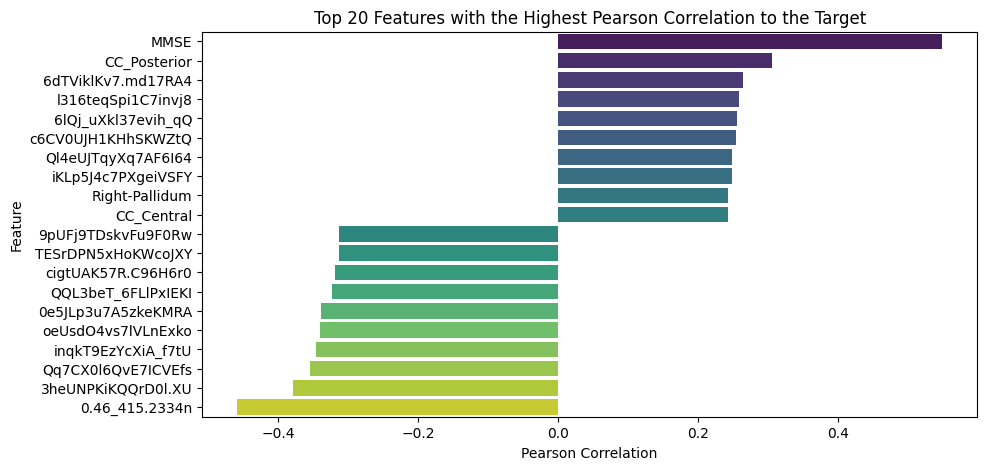

In [66]:
#creat a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=subset_pearson.values, y=subset_pearson.index, palette='viridis')
plt.title('Top 20 Features with the Highest Pearson Correlation to the Target')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.show()

#### Spearman Correlation

In [60]:
corr_matrix = data.corr(method='spearman')  # This computes the correlation matrix
target_corr = corr_matrix['Target']        # This extracts the correlations with the target variable

# To find the features with the highest correlation to the target, excluding the target itself
sorted_correlation_spearman = target_corr.drop(labels=['Target']).sort_values(ascending=False)

In [61]:
sorted_correlation_spearman.head(10)

MMSE                  0.472437
iKLp5J4c7PXgeiVSFY    0.335691
6lQj_uXkl37evih_qQ    0.332040
c6CV0UJH1KHhSKWZtQ    0.327455
Ql4eUJTqyXq7AF6I64    0.326302
lvYRUsVca4gko4vQm0    0.319943
KUOUF05oGqWHGe.E0E    0.314434
CC_Posterior          0.310331
l316teqSpi1C7invj8    0.309789
Teee5.43efFvQim7ko    0.306110
Name: Target, dtype: float64

In [67]:
top_5_features = sorted_correlation_spearman.head(10).index.tolist()
bottom_5_features = sorted_correlation_spearman.tail(10).index.tolist()

subset_spearman = sorted_correlation_spearman[top_5_features + bottom_5_features]

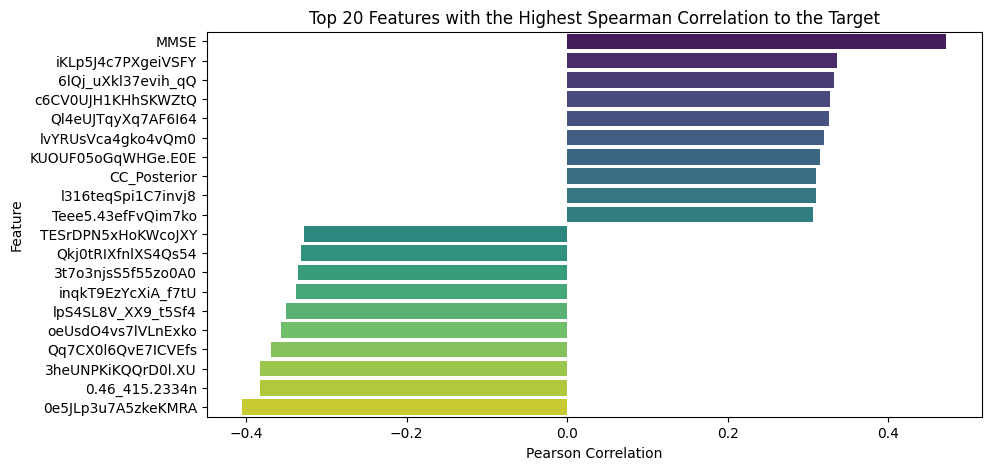

In [68]:
#creat a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=subset_spearman.values, y=subset_spearman.index, palette='viridis')
plt.title('Top 20 Features with the Highest Spearman Correlation to the Target')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.show()

In [82]:
#aggregate the list of highliy correlated features between pearson and spearman 
full_list = subset_pearson.index.tolist() + subset_spearman.index.tolist()
full_list = list(set(full_list))

print(f"highly_correlated_features: {len(full_list)}")

highly_correlated_features: 26


In [83]:
data_subset = data[full_list + ['Target']]

In [87]:
data_subset

,KUOUF05oGqWHGe.E0E,0.46_415.2334n,MMSE,l316teqSpi1C7invj8,QQL3beT_6FLlPxIEKI,Right-Pallidum,Teee5.43efFvQim7ko,iKLp5J4c7PXgeiVSFY,Qq7CX0l6QvE7ICVEfs,c6CV0UJH1KHhSKWZtQ,...,6lQj_uXkl37evih_qQ,lpS4SL8V_XX9_t5Sf4,cigtUAK57R.C96H6r0,9pUFj9TDskvFu9F0Rw,TESrDPN5xHoKWcoJXY,Qkj0tRIXfnlXS4Qs54,oeUsdO4vs7lVLnExko,CC_Posterior,Ql4eUJTqyXq7AF6I64,Target
0,0.841824,0.048057,0.777778,0.747081,0.532338,0.495176,0.777565,0.735814,0.526711,0.802518,...,0.857744,0.486253,0.616054,0.847529,0.747125,0.619793,0.755050,0.521047,0.747352,0
1,0.768248,0.132110,0.833333,0.593739,0.818397,0.576026,0.712191,0.750496,0.912251,0.664901,...,0.614802,0.746494,0.655147,0.774444,0.783969,0.932728,0.864320,0.000000,0.601007,0
2,0.682580,0.091966,0.722222,0.560734,1.000000,0.597984,0.700910,0.684084,1.000000,0.443109,...,0.491536,1.000000,1.000000,0.888217,0.908788,1.000000,0.972609,0.822373,0.417712,0
3,0.665805,0.065429,0.500000,0.611490,0.735682,0.632829,0.804736,0.781247,0.766440,0.550718,...,0.571444,0.748452,0.856813,0.772588,0.920378,0.718277,0.781524,0.649195,0.588206,0
4,0.782266,0.053433,0.888889,0.622072,0.620309,0.779626,0.710375,0.705810,0.802591,0.705637,...,0.677415,0.952963,0.842615,0.743505,0.664278,0.924322,0.808873,0.548723,0.843985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.971858,0.168956,1.000000,0.823085,0.426669,0.808423,0.904356,0.862214,0.521036,0.789867,...,0.736504,0.544354,0.560928,0.513256,0.583686,0.582703,0.609683,0.808490,0.693162,2
186,0.881750,0.334803,1.000000,0.793236,0.222044,0.557955,0.801676,0.752130,0.463595,0.909442,...,0.647404,0.617191,0.291362,0.532293,0.614865,0.539615,0.344299,0.503782,0.660439,2
187,0.973973,0.141714,0.666667,0.676335,0.527385,0.480634,0.679854,0.656201,0.672389,0.737005,...,0.768845,0.571090,0.582044,0.705924,0.584379,0.648050,0.656352,0.659162,1.000000,2
188,0.945256,0.151011,0.888889,0.782499,0.404297,0.447804,0.913594,0.854841,0.644763,0.781397,...,0.760602,0.696343,0.579930,0.355742,0.452131,0.775029,0.378176,0.688974,0.920701,2


#### Covariance

In [88]:
covariance_matrix = covar(data_subset)

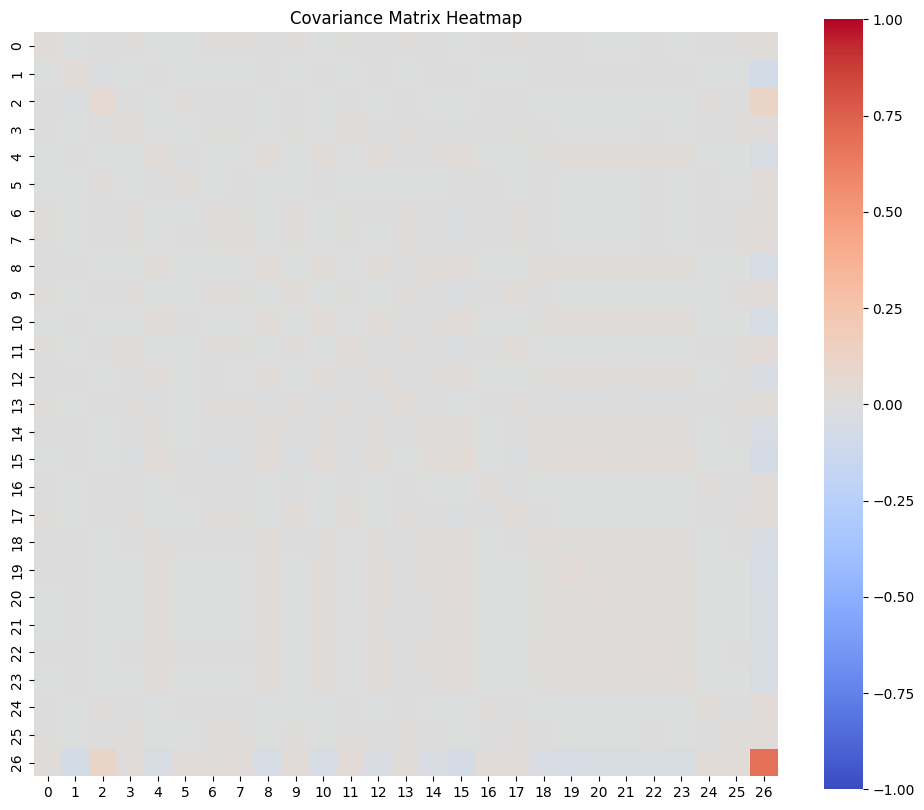

In [90]:
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

#### Variance

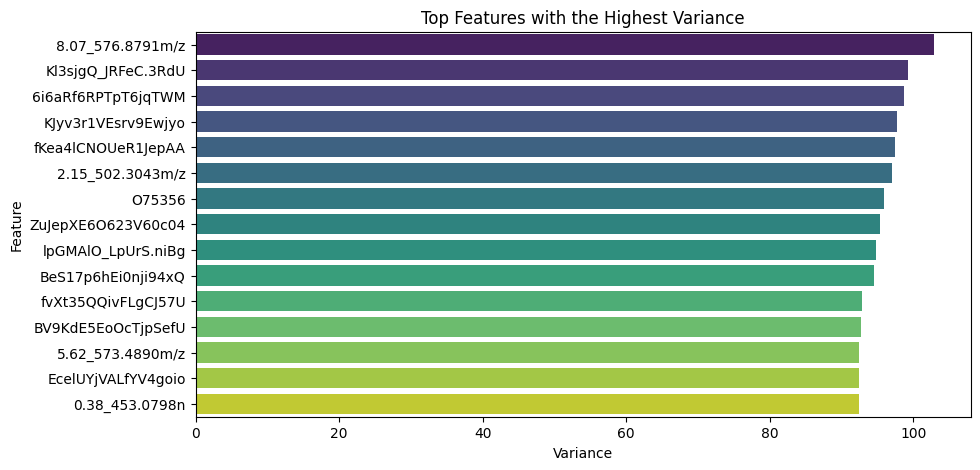

In [107]:
#get the 10 features with the highest variance
variance = variance_condition(data)
#sort the variance array
variance.sort()
variance = variance[::-1]
features = data.columns.tolist()

#creat a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=variance[:15], y=features[:15], palette='viridis')
plt.title('Top Features with the Highest Variance')
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.show()

#### Kurtosis

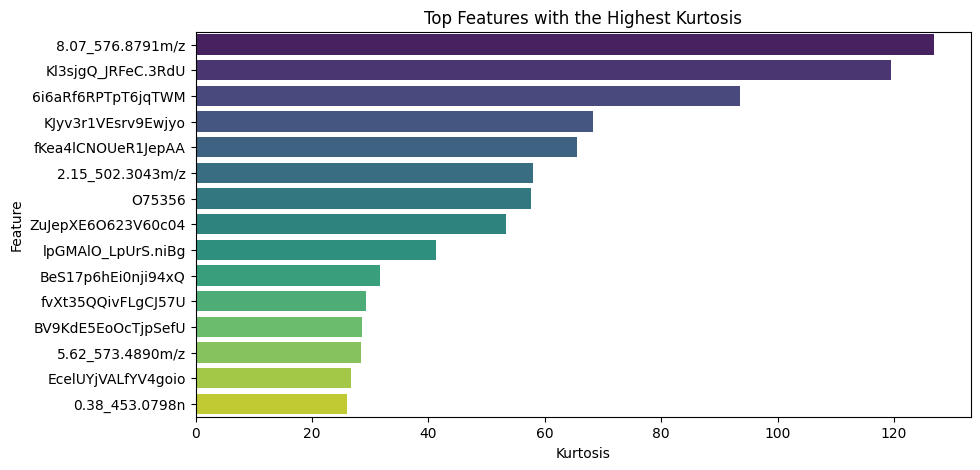

In [112]:
kurtosis_values = kurtosis(data)

#sort the kurtosis array
kurtosis_values.sort()
kurtosis_values = kurtosis_values[::-1]

#get indicies of top 10 and bottom features
top_15 = np.argsort(kurtosis_values)[::-1][:15]

#keep subset of top 10 and bottom 10 features
subset_kurtosis = kurtosis_values[top_15].tolist()
subset_features = [features[i] for i in top_15] 

#creat a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=subset_kurtosis, y=subset_features, palette='viridis')
plt.title('Top Features with the Highest Kurtosis')
plt.xlabel('Kurtosis')
plt.ylabel('Feature')
plt.show()

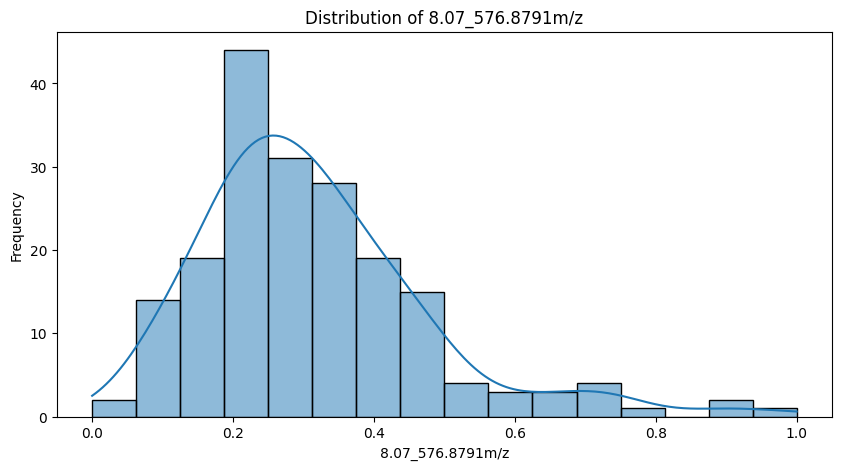

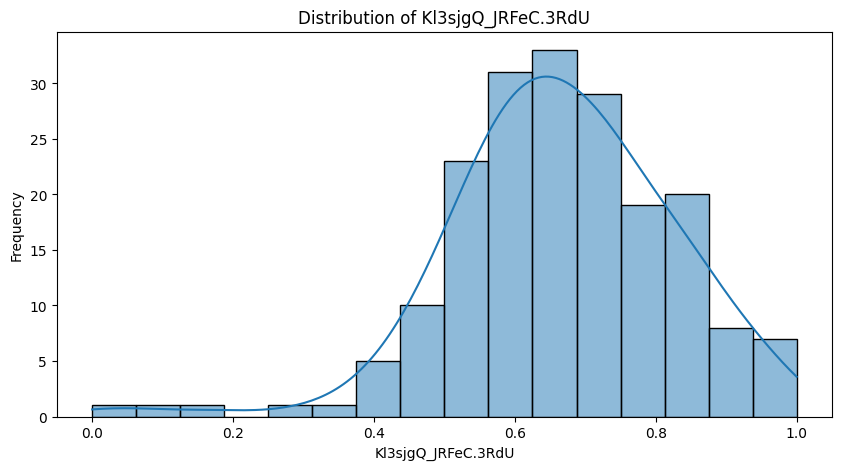

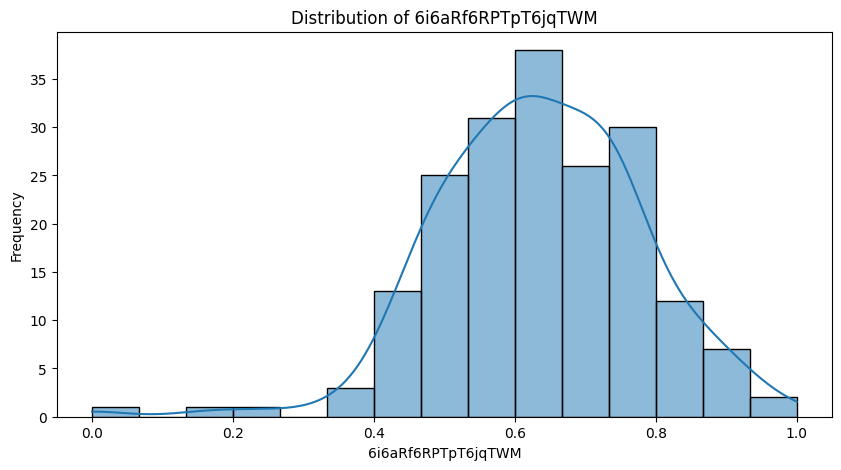

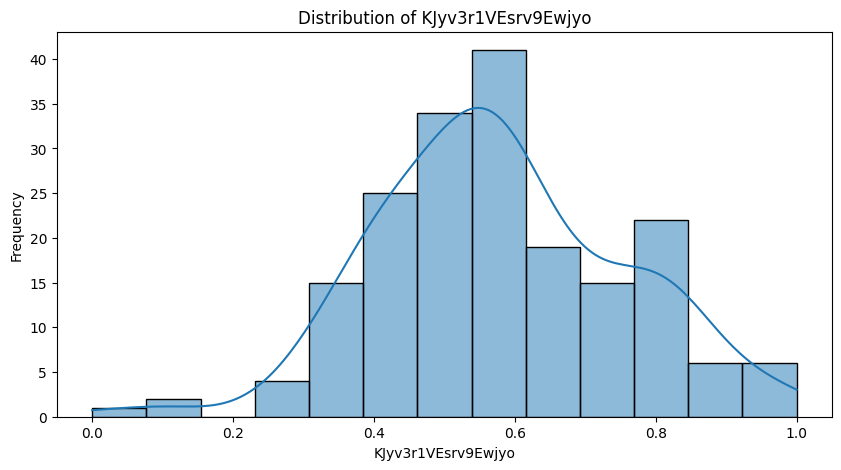

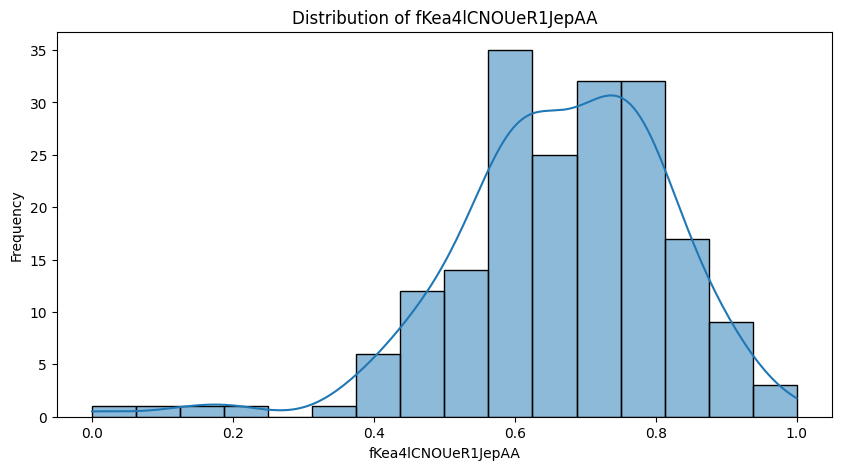

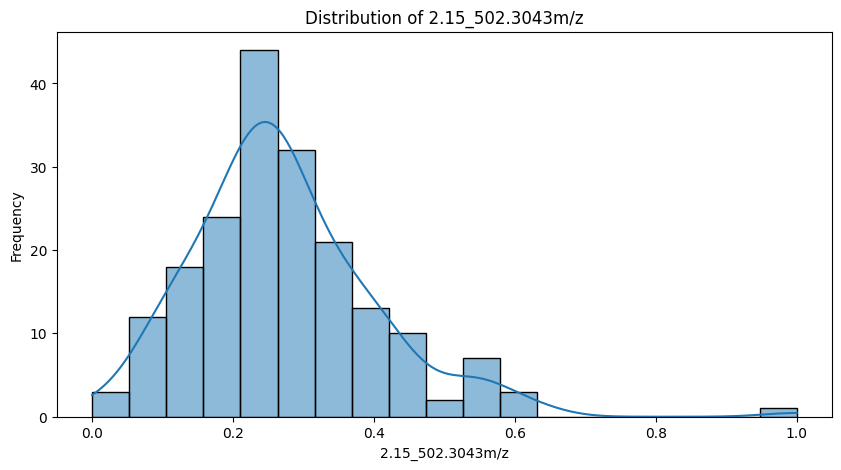

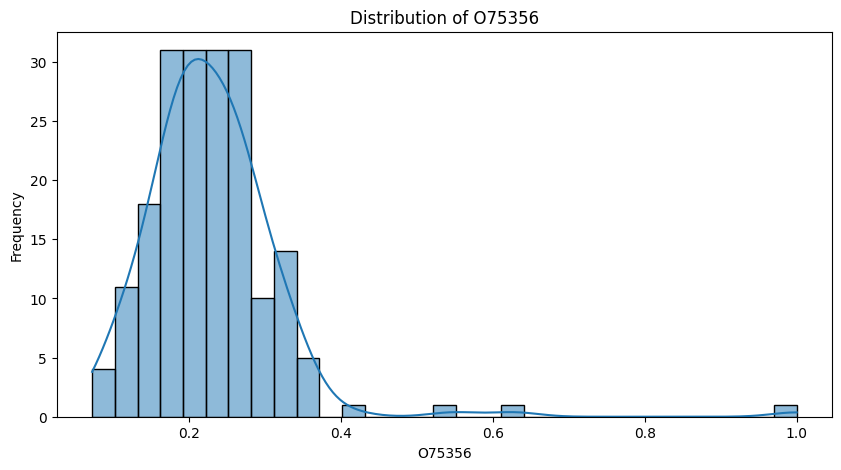

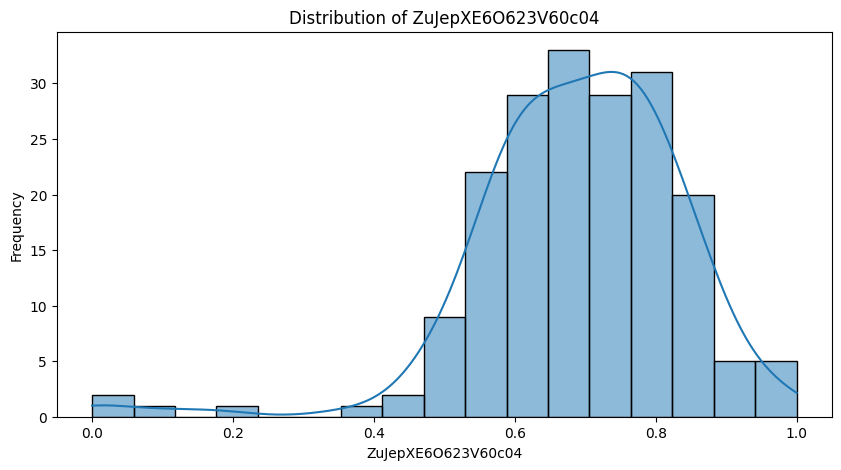

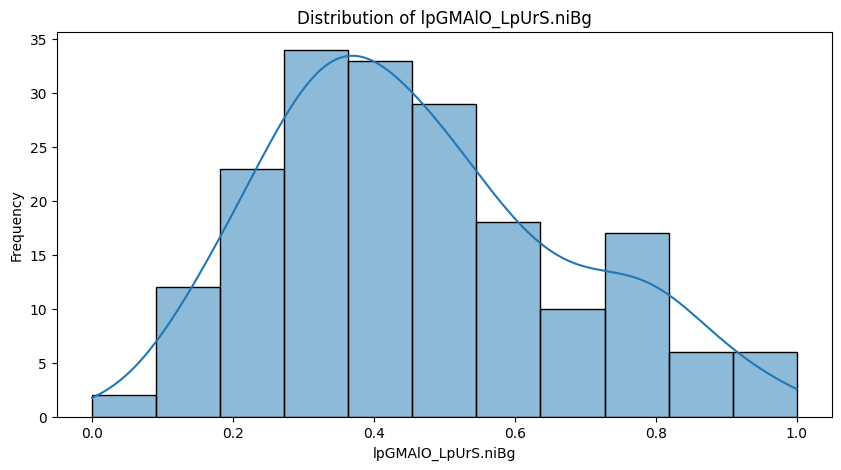

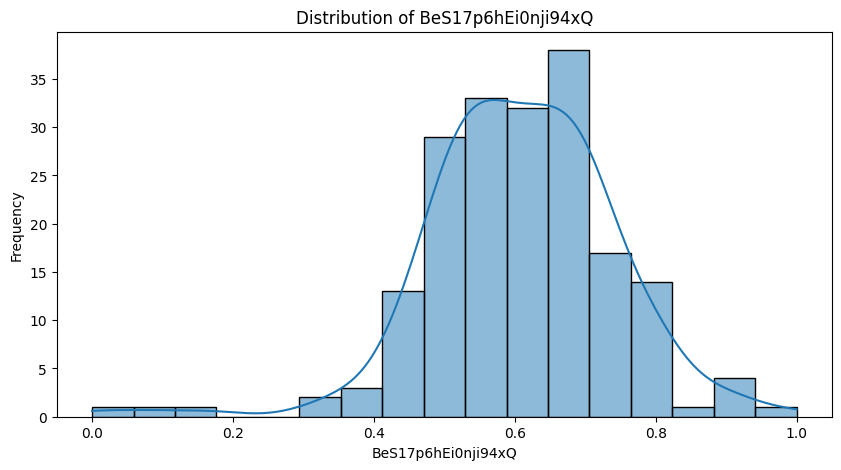

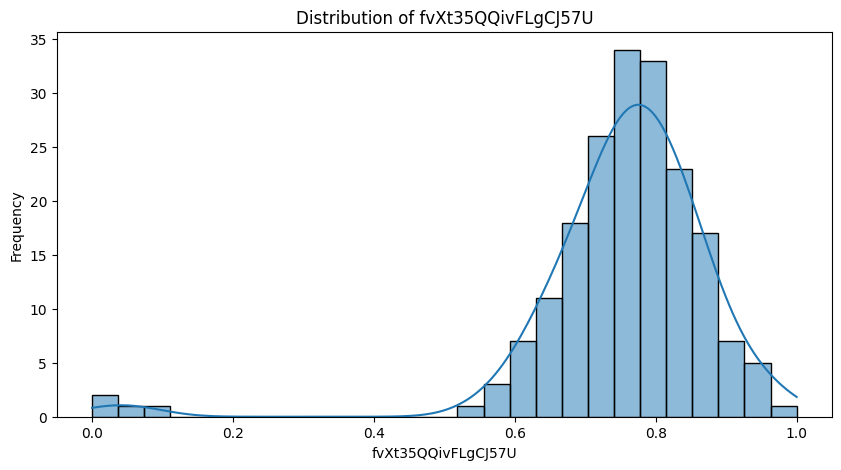

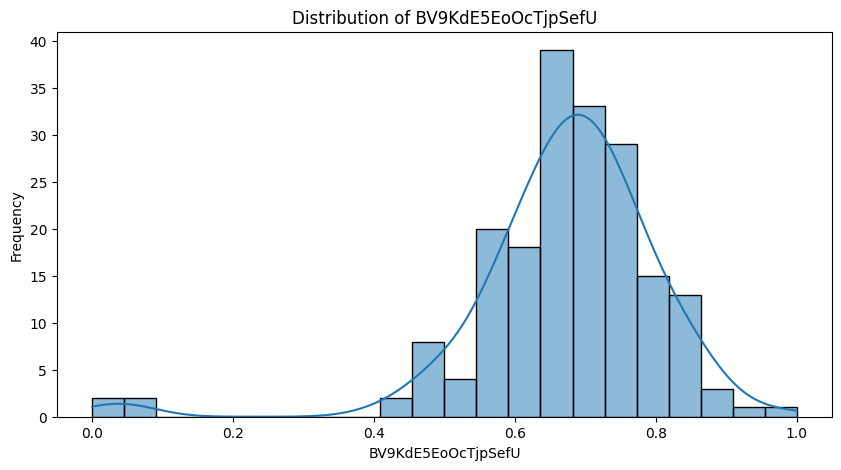

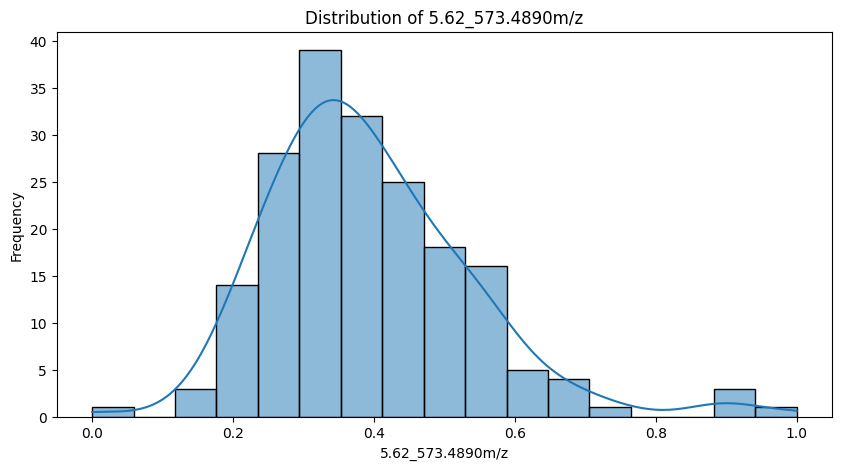

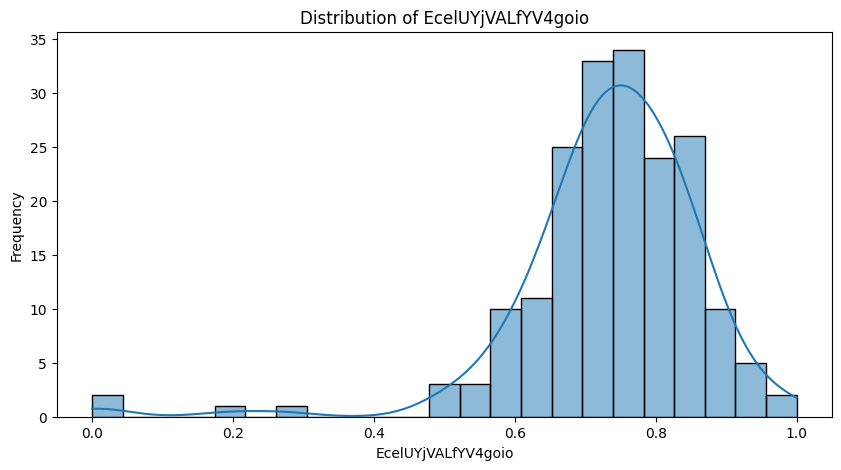

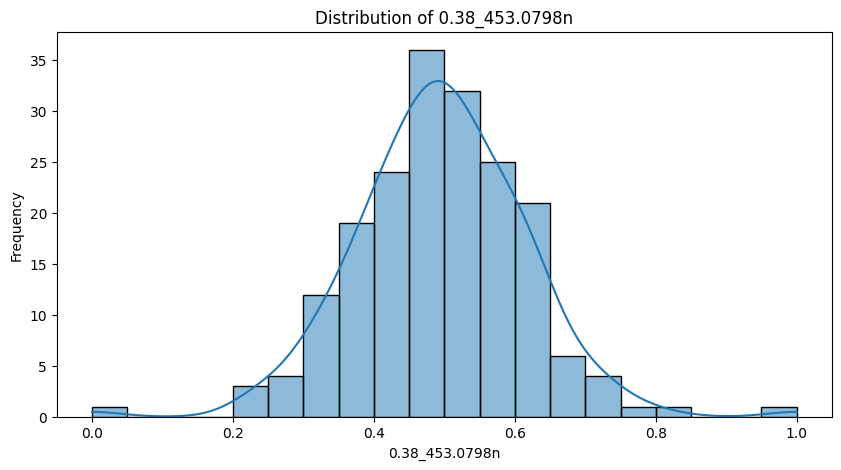

In [114]:
#check distibution of highly kurtotic features
for feature in subset_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Mean Absolute Deviation

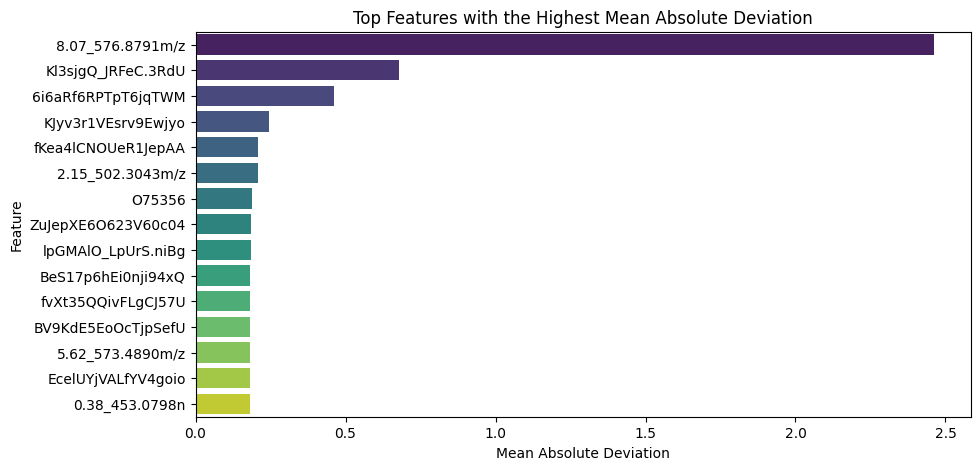

In [113]:
mean_absolute_deviation_values = mean_absolute_deviation(data)

#sort the mean absolute deviation array
mean_absolute_deviation_values.sort()
mean_absolute_deviation_values = mean_absolute_deviation_values[::-1]

#get indicies of top 10 and bottom features
top_15 = np.argsort(mean_absolute_deviation_values)[::-1][:15]

#keep subset of top 10 and bottom 10 features
subset_mad = mean_absolute_deviation_values[top_15].tolist()
subset_features = [features[i] for i in top_15]

#creat a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=subset_mad, y=subset_features, palette='viridis')
plt.title('Top Features with the Highest Mean Absolute Deviation')
plt.xlabel('Mean Absolute Deviation')
plt.ylabel('Feature')
plt.show()

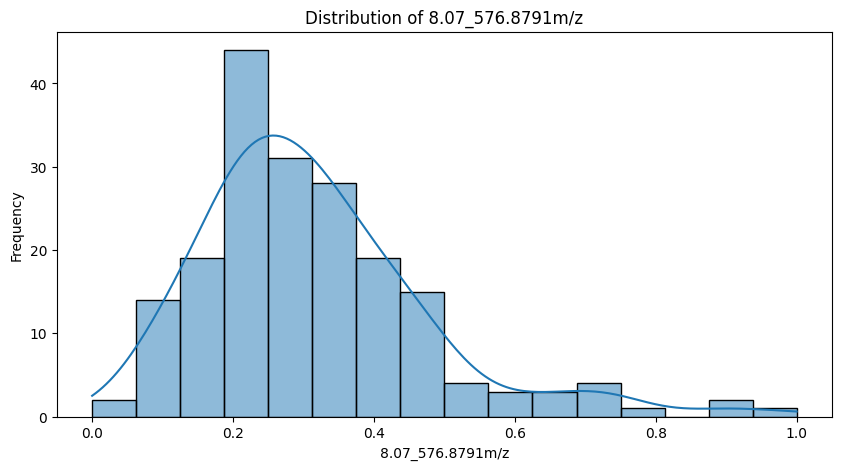

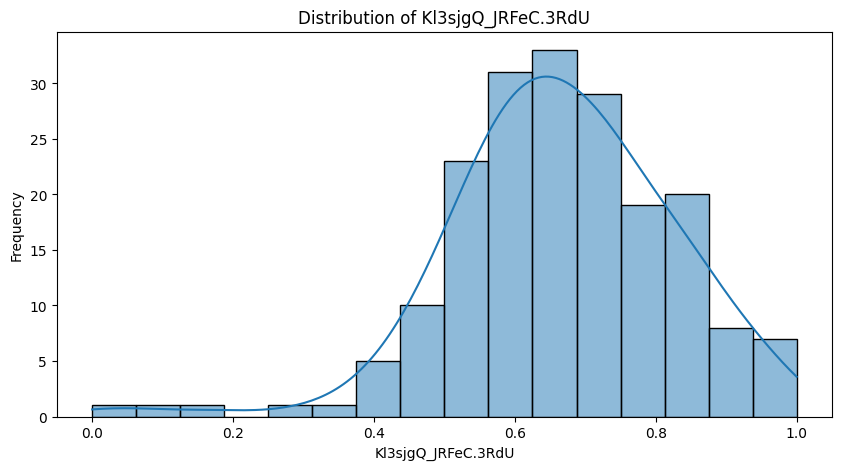

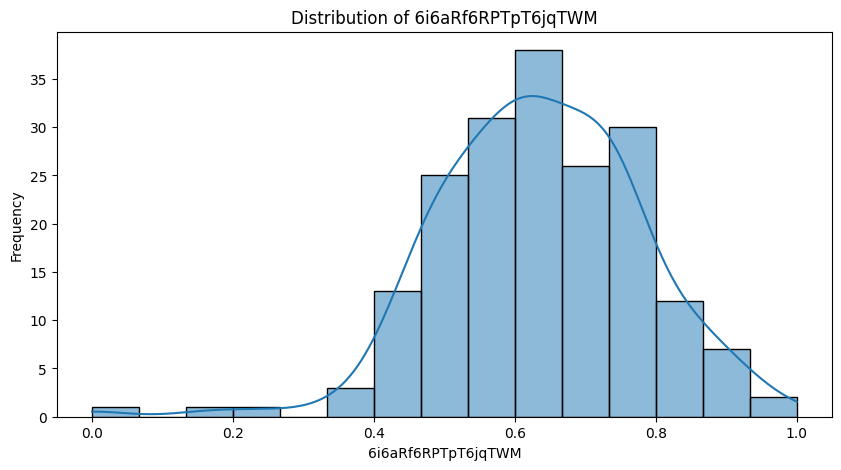

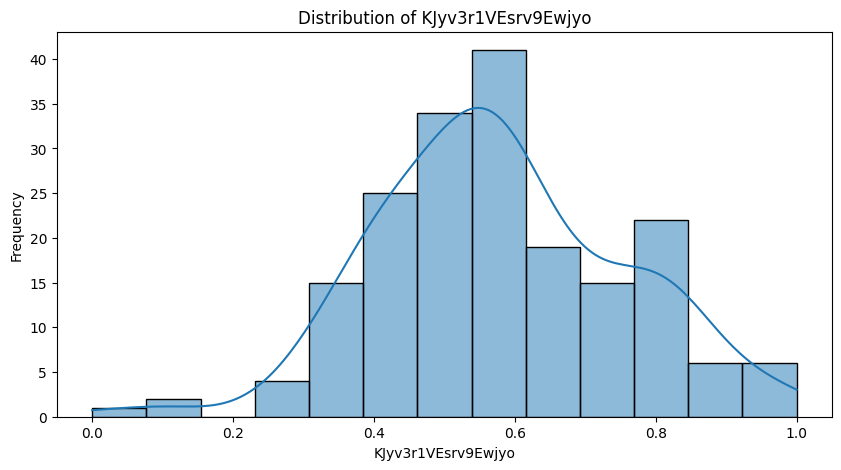

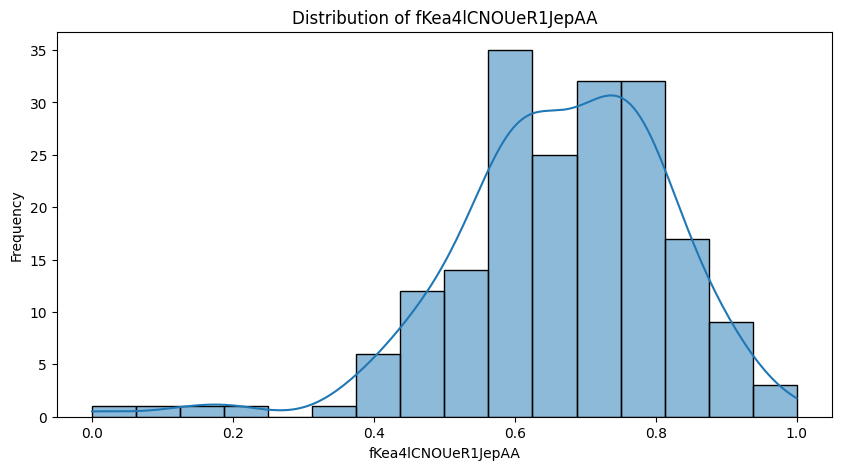

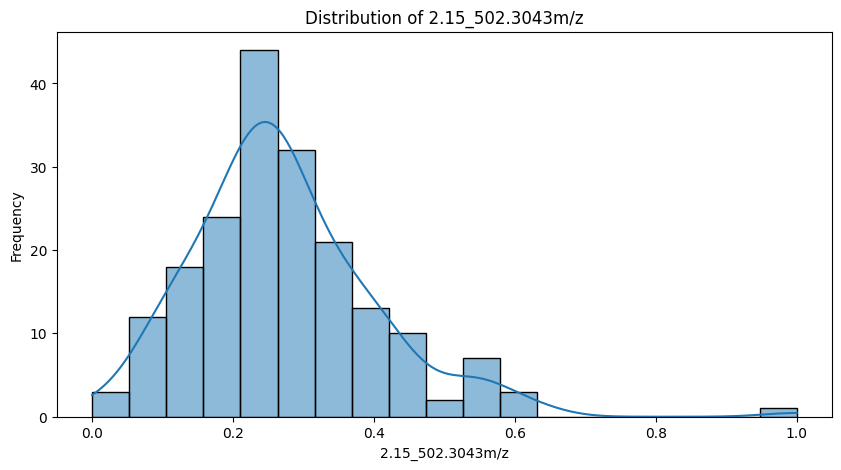

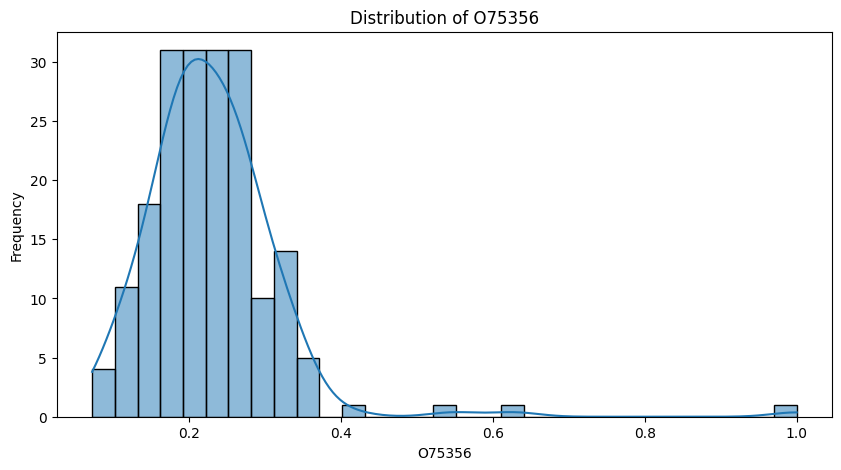

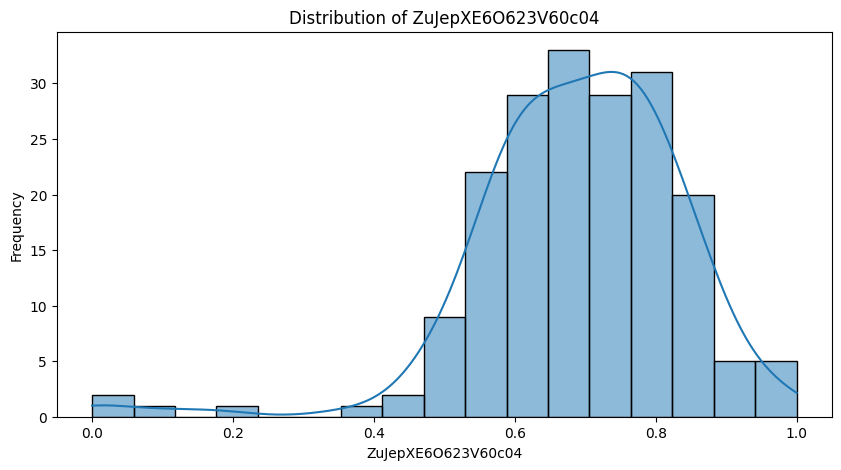

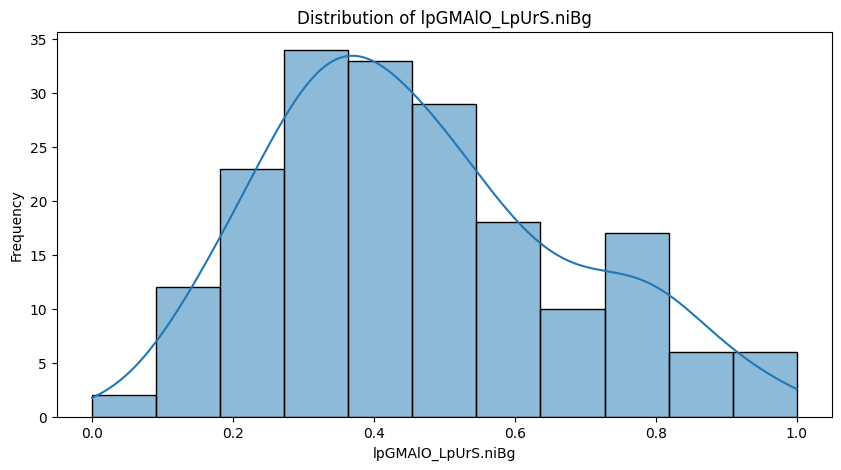

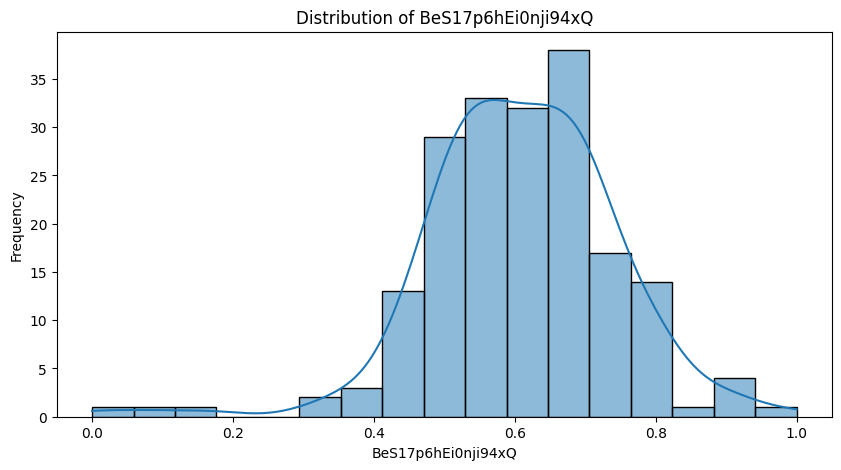

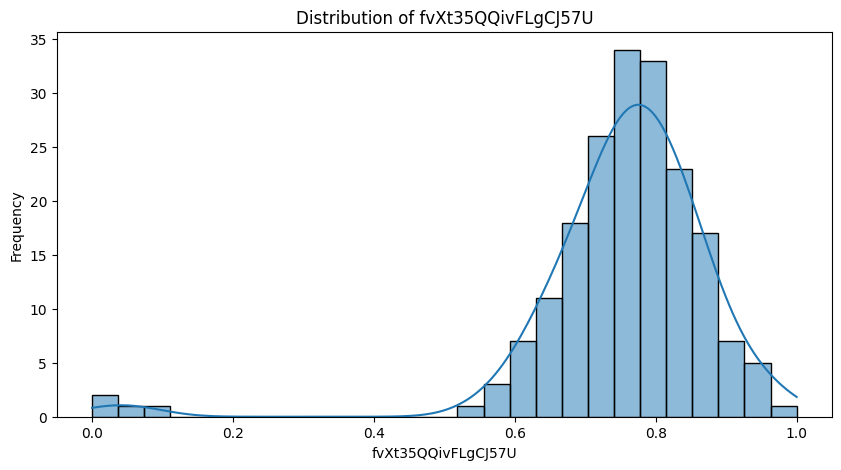

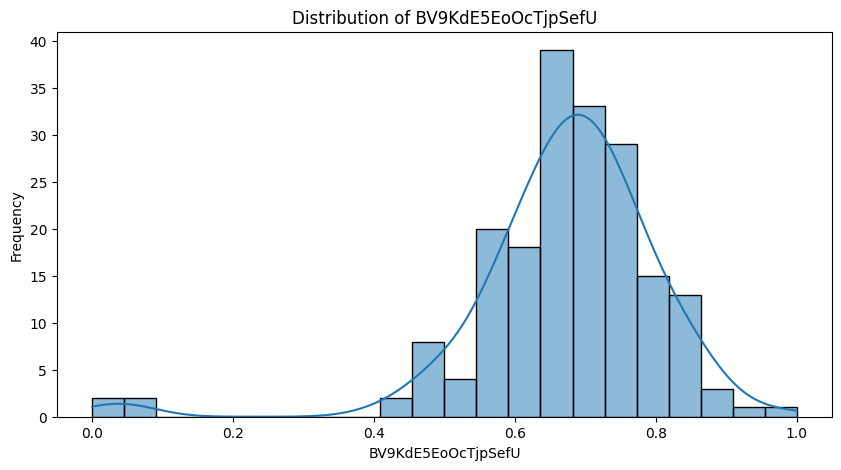

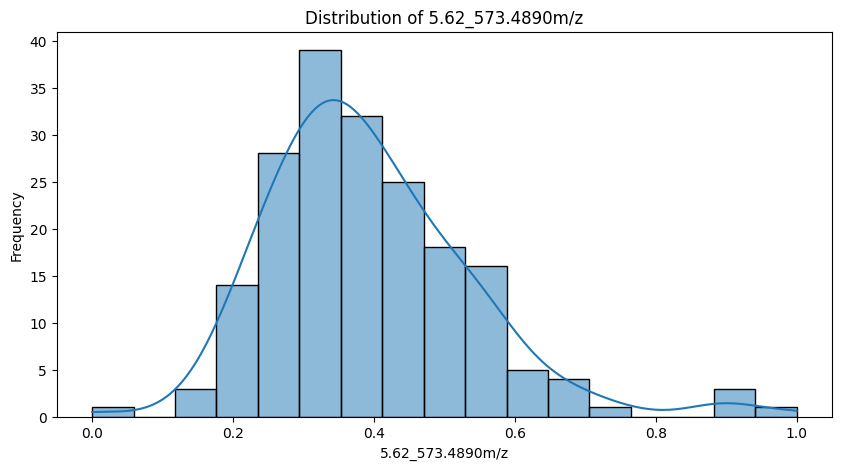

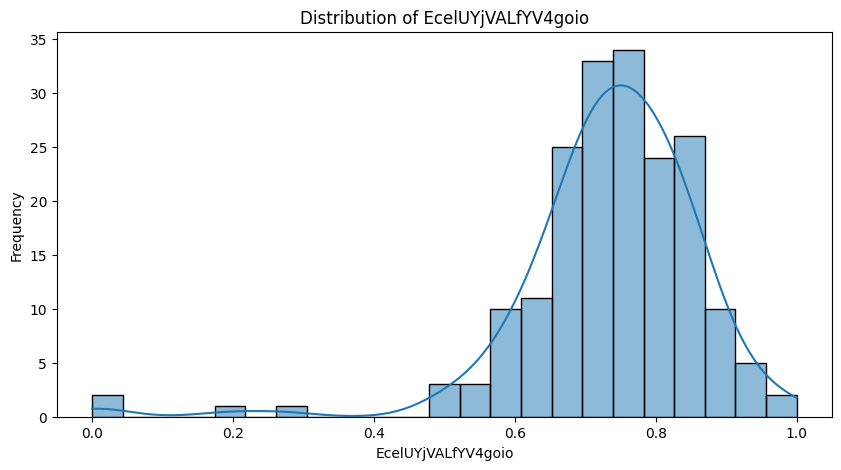

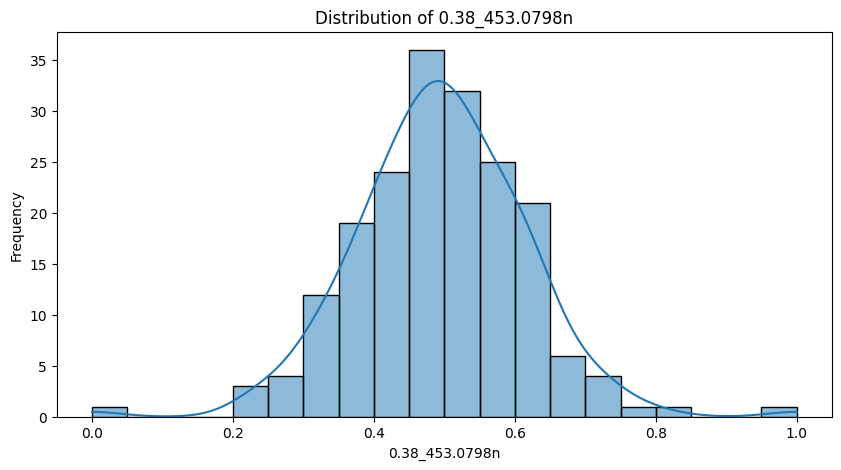

In [115]:
#check distibution of high mean absolute deviation features
for feature in subset_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

#### Skewness

In [117]:
data = data.drop(columns=['Target'])

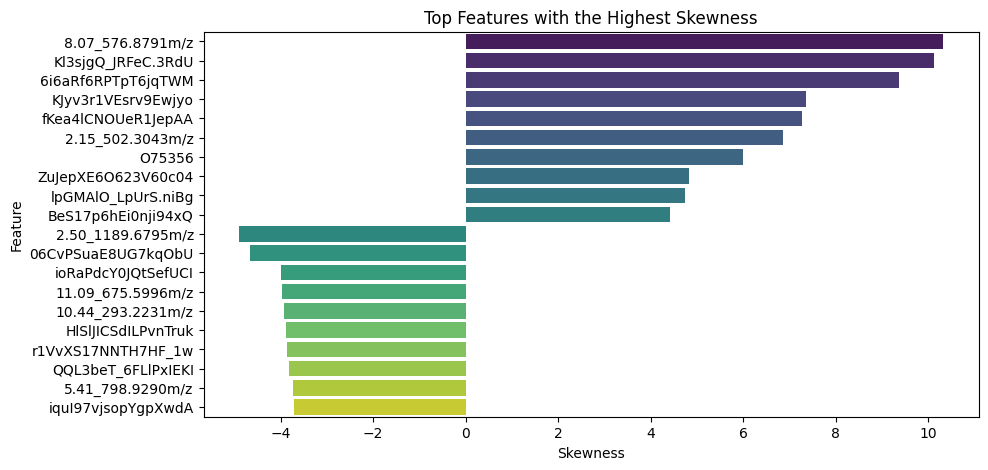

In [118]:
skewness_values = skewness(data)

#sort the skewness array
skewness_values.sort()
skewness_values = skewness_values[::-1]

#get indicies of top 10 and bottom features
top_10 = np.argsort(skewness_values)[::-1][:10]
bottom_10 = np.argsort(skewness_values)[:10]

#keep subset of top 10 and bottom 10 features
subset_skewness = skewness_values[top_10].tolist() + skewness_values[bottom_10].tolist()
subset_features = [features[i] for i in top_10] + [features[i] for i in bottom_10]

#creat a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=subset_skewness, y=subset_features, palette='viridis')
plt.title('Top Features with the Highest Skewness')
plt.xlabel('Skewness')
plt.ylabel('Feature')
plt.show()


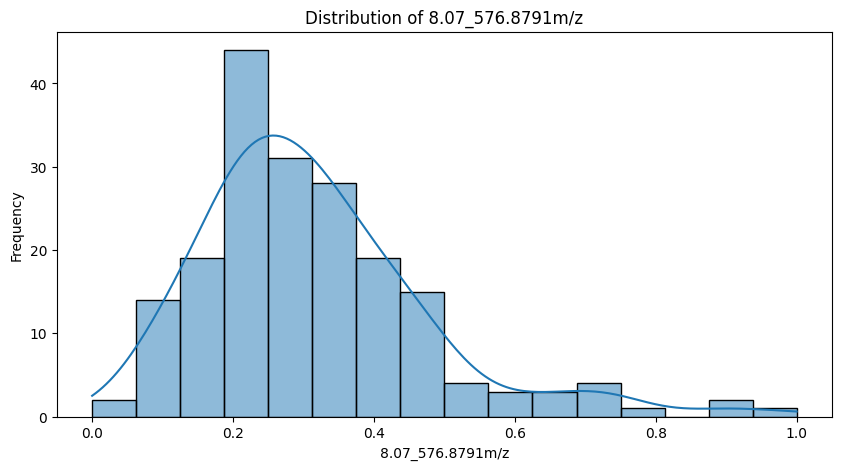

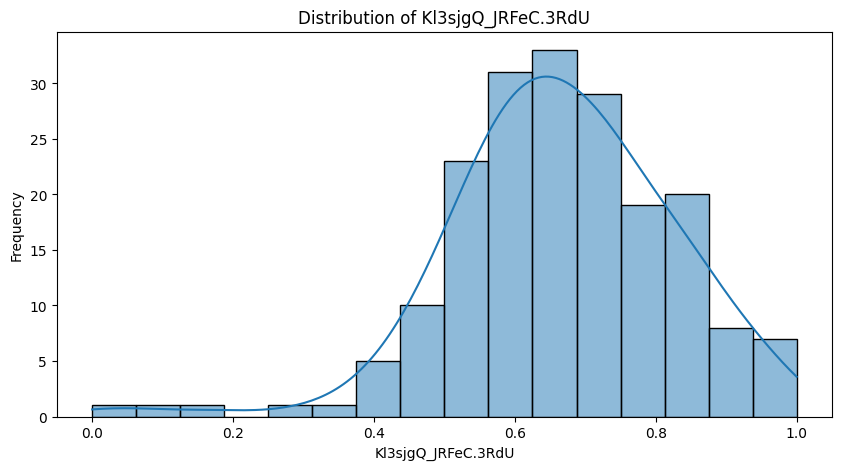

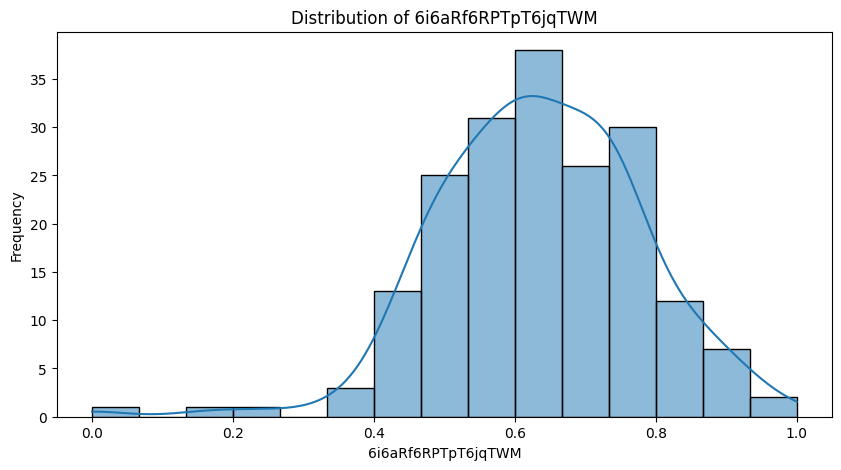

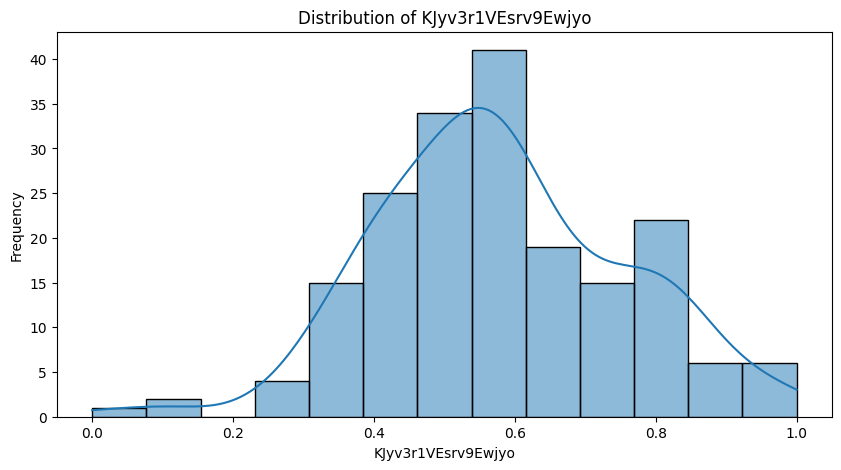

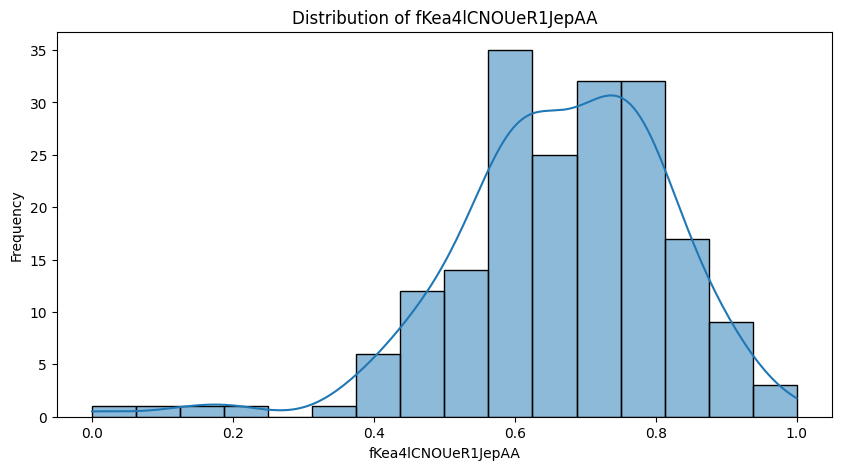

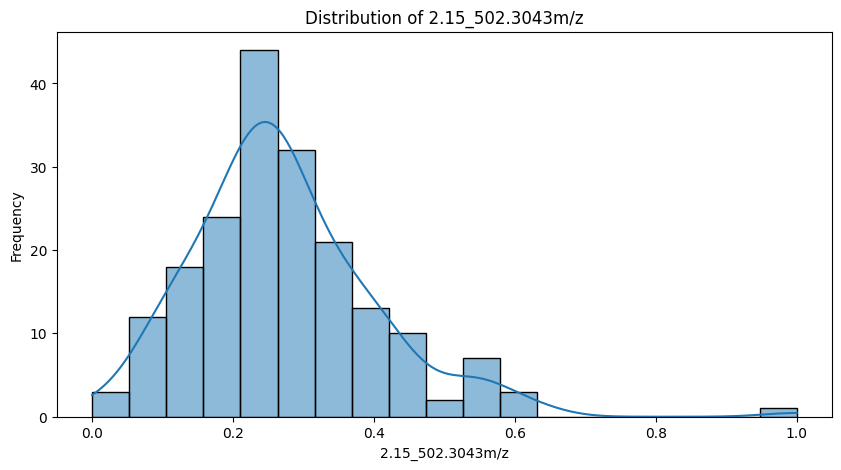

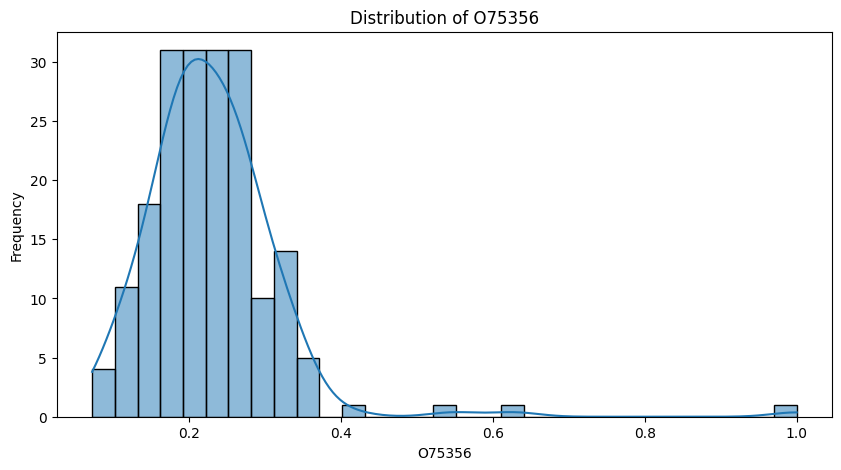

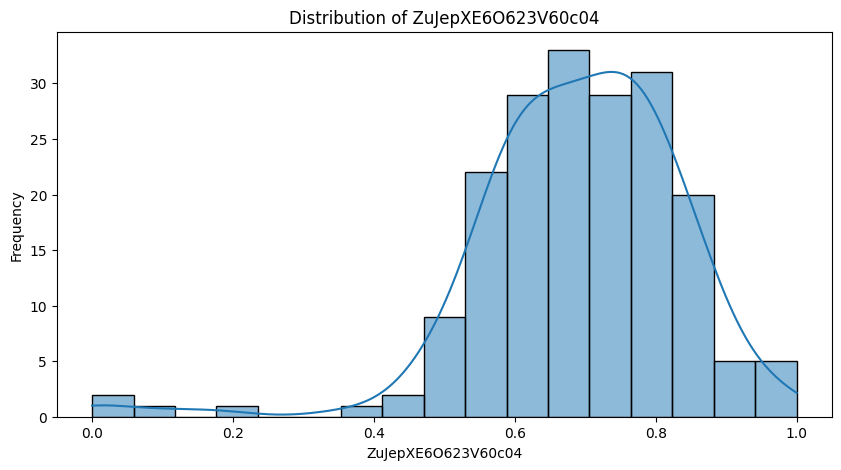

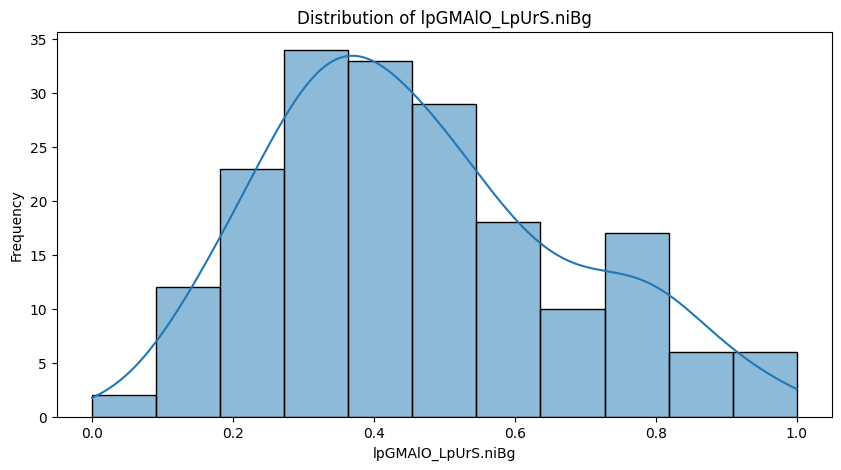

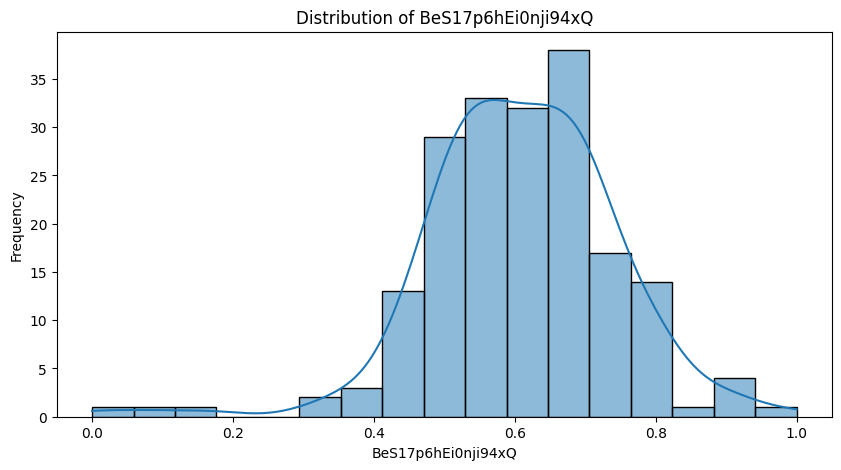

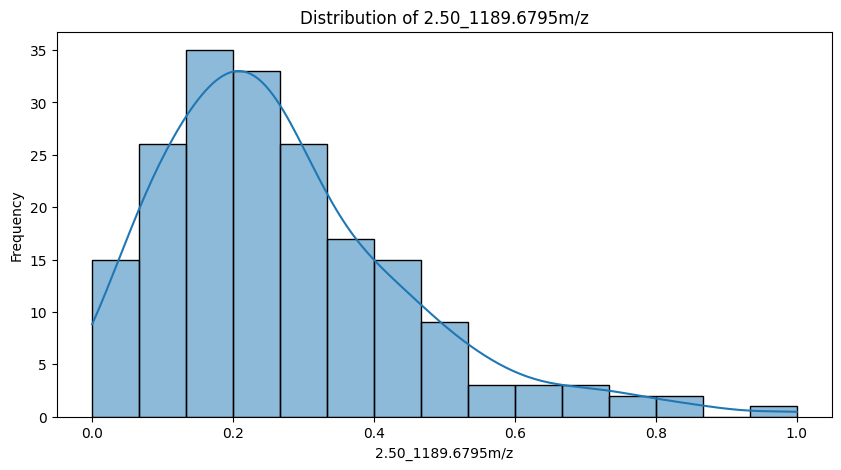

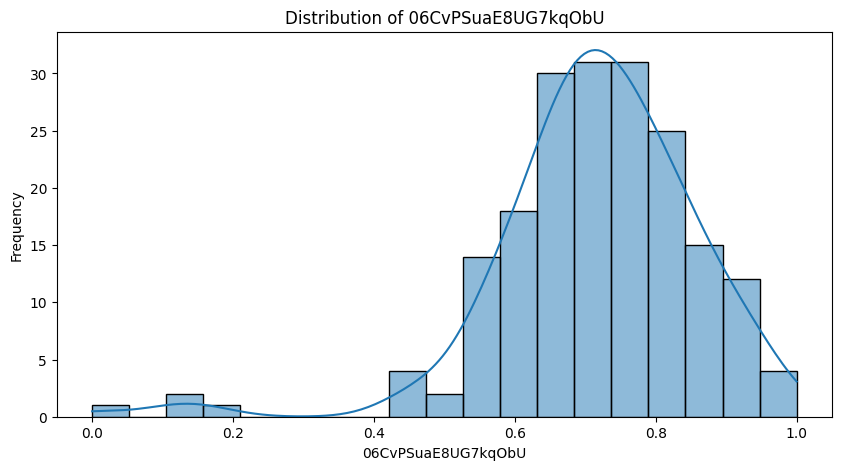

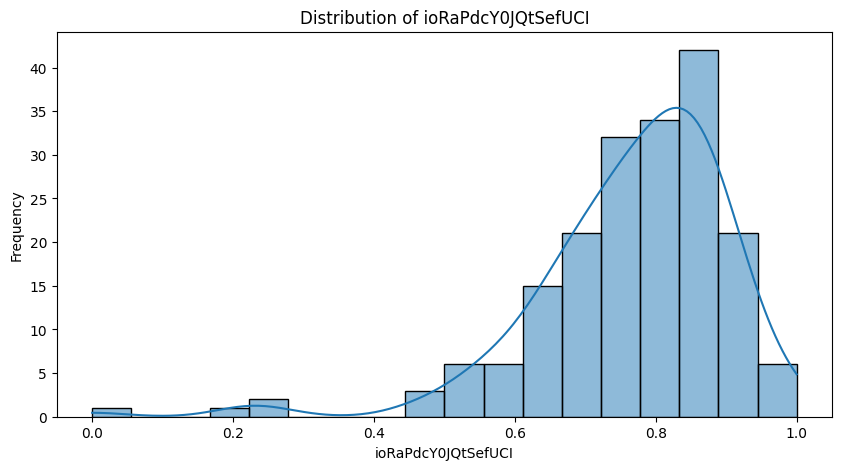

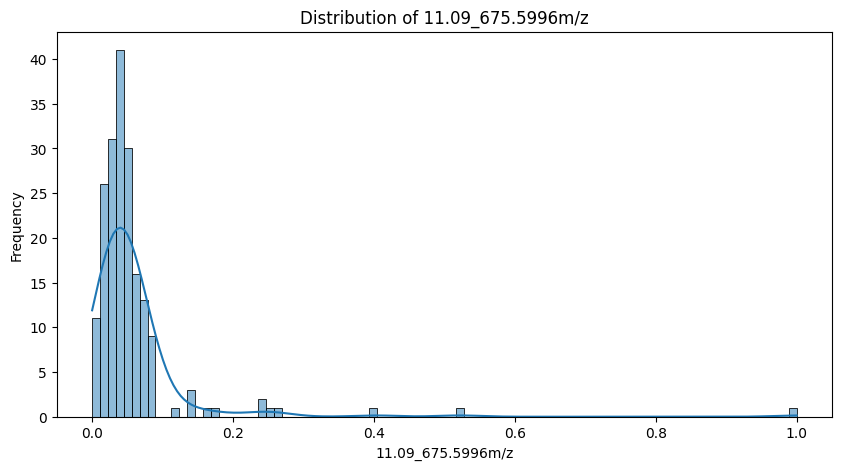

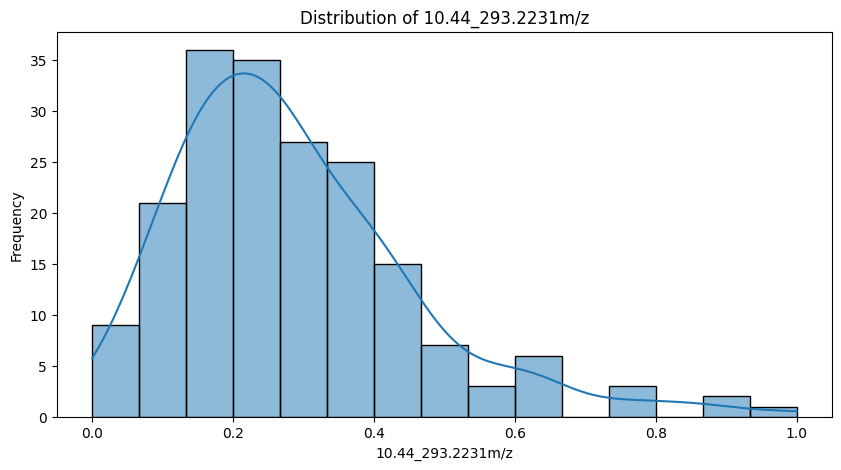

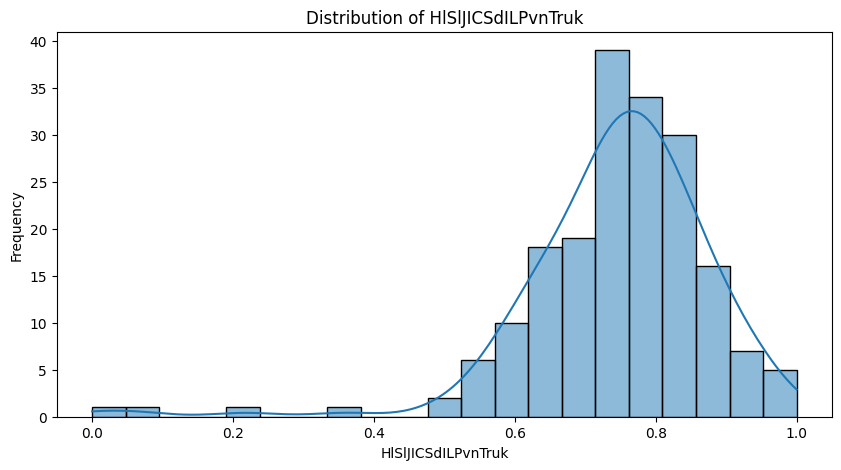

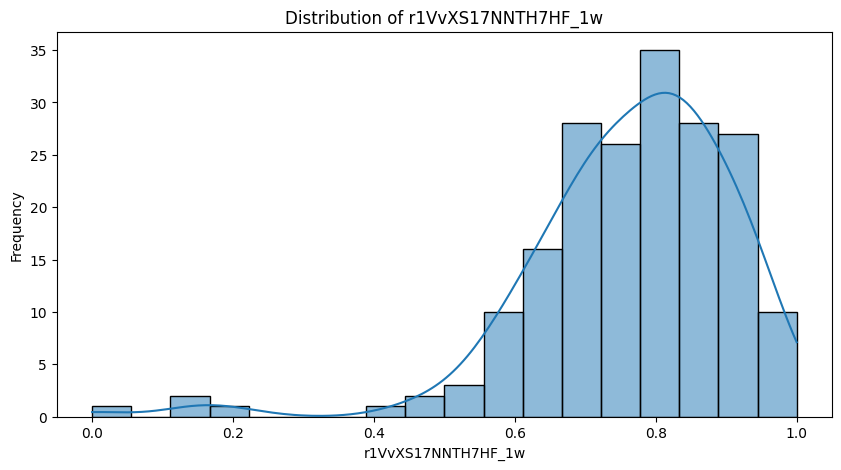

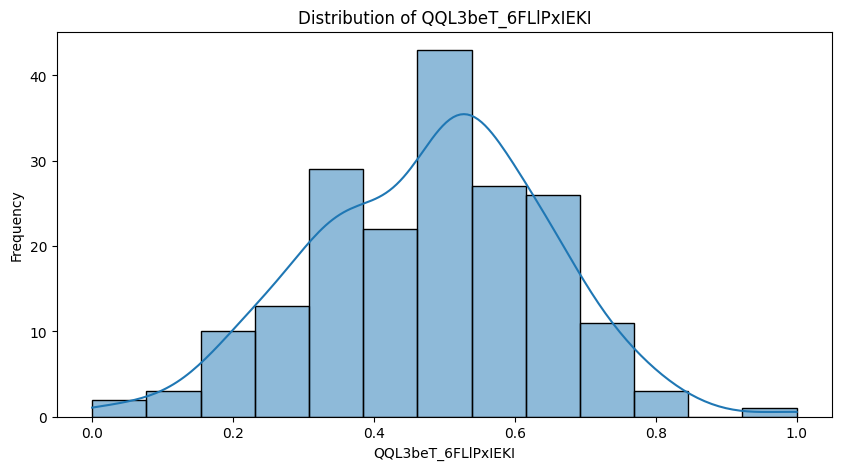

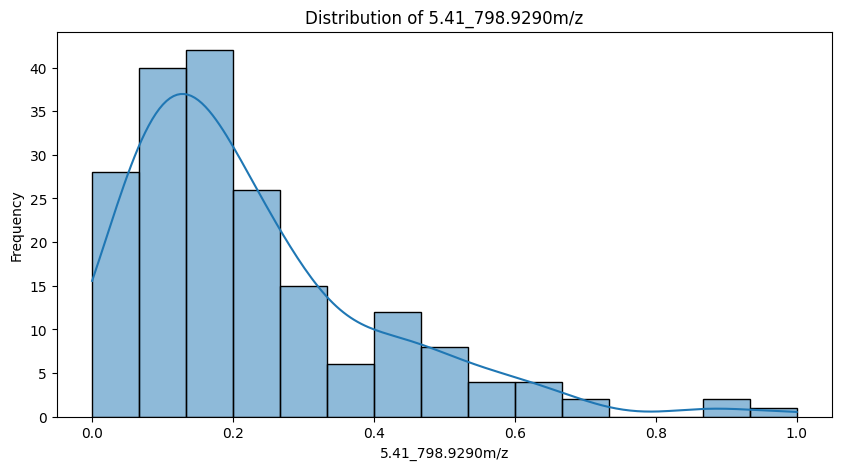

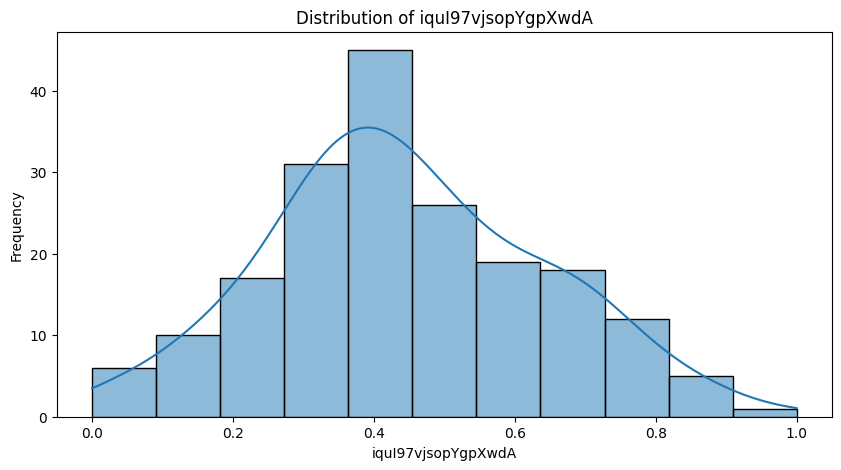

In [119]:
#check distibution of highly skewed features
for feature in subset_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### 2. Contingency Tables and Related Tests

In [120]:
from hypothetical.contingency import ChiSquareContingency, CochranQ, McNemarTest, table_margins, expected_frequencies

#### Chi Square Contingency

##### Gender and Diagnosis

In [135]:
# Counts of True/False for each category in 'Target'
count_target_0 = np.sum(data['Target'] == 0)
count_target_1 = np.sum(data['Target'] == 1)

# Assuming another binary variable 'Group' which also needs to be split like 'Target'
count_group_0 = np.sum(data['Sex'] == 0)
count_group_1 = np.sum(data['Sex'] == 1)

# Creating a 2x2 contingency table
observed = np.array([[count_target_0, count_target_1], [count_group_0, count_group_1]])

c2 = ChiSquareContingency(observed)

c2.test_summary


{'chi-square': 0.06277360671165755,
 'p-value': 0.8021646596976921,
 "Cramer's V": 0.01409434830528943,
 'Contingency Coefficient': 0.014092948588071696,
 'Phi Coefficient': -0.01409434830528943,
 'Tschuprow Coefficient': 0.01409434830528943,
 'degrees of freedom': 1,
 'continuity': True}

**Chi-Square Statistic**

**'chi-square': 0.06277360671165755**
- This value represents the chi-square statistic, a measure used to evaluate how much the observed frequencies deviate from the expected frequencies under the null hypothesis (that there is no association between the variables). A lower value, as in this case, indicates a smaller deviation, suggesting that the observed data fits well with the expected data if the null hypothesis were true.

**'p-value': 0.8021646596976921**
- The p-value assesses the probability of observing the computed chi-square statistic or more extreme values if the null hypothesis is true. A p-value of approximately 0.802 means there is an 80.2% chance of finding a chi-square value this high or higher due to random chance alone. A high p-value (commonly a threshold of 0.05 is used) leads to not rejecting the null hypothesis, indicating that the evidence isn't strong enough to conclude that there is an association between the variables.

**"Cramer's V": 0.01409434830528943**
- Cramer’s V is a measure of the strength of association between two nominal variables, and it is derived from the chi-square statistic. It ranges from 0 to 1, where 0 means no association and 1 indicates a perfect association. A Cramer’s V of approximately 0.014 suggests a very weak association.

**'Contingency Coefficient': 0.014092948588071696**
- Similar to Cramer's V, the Contingency Coefficient is another measure derived from the chi-square statistic, used to indicate the strength of association. However, it has an upper limit less than 1, typically less than 0.707 (for large tables), and depends on the size of the table. The value here again indicates a very weak association.

**'Phi Coefficient': -0.01409434830528943**
- The Phi Coefficient is a measure used specifically for 2x2 contingency tables and is equivalent to the Pearson correlation coefficient for dichotomous variables. It ranges from -1 to +1, with values near 0 indicating no association and values near ±1 indicating a strong association. The negative sign here is a directional measure, but the magnitude suggests a negligible association.

**'Tschuprow Coefficient': 0.01409434830528943**
- Tschuprow’s T is another measure of association for categorical variables that takes into account the size of the table (the number of rows and columns). Like Cramer’s V, it ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association. The value here, like Cramer’s V, suggests a very weak association.

**'degrees of freedom': 1**
- The degrees of freedom for a chi-square test is typically calculated as (Number of rows - 1) * (Number of columns - 1). In your case, it is 1, suggesting a 2x2 table was analyzed.

**'continuity': True**
- The continuity correction (Yates’ correction) is applied to the chi-square calculation to adjust for the approximation of using a continuous chi-square distribution to represent a discrete distribution, particularly important in small samples or when the cell counts are low. It tends to make the test more conservative.

**Summary**
- Overall, these results suggest that there is very weak or no significant association between the categorical variables tested, as indicated by all measures of association being close to zero and a high p-value. This typically means that any observed differences in the contingency table are likely due to chance.

##### MMSE and Diagnosis

In [151]:
#creat categorical variable for MMSE: very low: 0-0.25, low: 0.25-0.5, moderate: 0.5-0.75, high: 0.75-1
data['MMSE_Cat'] = pd.cut(data['MMSE'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['very low', 'low', 'moderate', 'high'])

In [142]:
# Counts of True/False for each category in 'Target'
count_target_0 = np.sum(data['Target'] == 0)
count_target_1 = np.sum(data['Target'] == 1)

# Counts of True/False for each category in 'MMSE_Cat'
count_mmse_0 = np.sum(data['MMSE_Cat'] == 'very low')
count_mmse_1 = np.sum(data['MMSE_Cat'] == 'low')
count_mmse_2 = np.sum(data['MMSE_Cat'] == 'moderate')
count_mmse_3 = np.sum(data['MMSE_Cat'] == 'high')

# Creating a 2x2 contingency table
# Example (modify according to your actual groups and target):
observed = np.array([[count_target_0, count_target_1], [count_mmse_0, count_mmse_3]])

# Now you can create an instance of ChiSquareContingency
c2 = ChiSquareContingency(observed)
c2.test_summary

{'chi-square': 58.95670242181542,
 'p-value': 1.611798882732483e-14,
 "Cramer's V": 0.4771080125953504,
 'Contingency Coefficient': 0.43060850179503446,
 'Phi Coefficient': 0.4771080125953504,
 'Tschuprow Coefficient': 0.4771080125953504,
 'degrees of freedom': 1,
 'continuity': True}

**Chi-Square Statistic**

**'chi-square': 58.95670242181542**
- This is a high chi-square statistic, indicating a significant difference between the observed and expected frequencies under the null hypothesis (which assumes no association between the variables). A high chi-square value like this suggests a strong departure from the null hypothesis.

**'p-value': 1.611798882732483e-14**
- The p-value is extremely low, practically zero for most practical purposes. This indicates that the probability of obtaining a chi-square value this high due to random chance is virtually nonexistent. Therefore, you would reject the null hypothesis and conclude that there is a statistically significant association between the groups.

**"Cramer's V": 0.4771080125953504**
- Cramer's V is a measure of association that tells us how strongly two categorical variables are related. It ranges from 0 (no association) to 1 (perfect association). A value of approximately 0.477 suggests a moderate to strong association between AD/Control status and MMSE scores, meaning these variables are meaningfully related in your dataset.

**'Contingency Coefficient': 0.43060850179503446**
- This coefficient adjusts the chi-square value for the size of the table and, like Cramer’s V, it also suggests a moderate association. Though it cannot reach 1, values closer to 0.5 in practical scenarios indicate a noteworthy relationship.

**'Phi Coefficient': 0.4771080125953504**
- The Phi Coefficient, particularly used for 2x2 tables, is identical to Cramer’s V in this context and underscores the same level of association. This confirms a robust relationship between the variables for this size of a contingency table.

**'Tschuprow Coefficient': 0.4771080125953504**
- Tschuprow's T further supports the findings of a moderate to strong association, adjusting for both the number of rows and columns, and is particularly useful for larger tables, though here it matches Cramer's V and Phi due to the table likely being 2x2.

**'degrees of freedom': 1**
- As with the previous result, one degree of freedom suggests that the test involves a 2x2 contingency table.

**'continuity': True**
- The continuity correction has been applied to adjust for the use of the chi-square approximation in a small sample or low count scenario, typically making the test more conservative, though it did not impact the strong statistical signals in your results.

**Summary**
- The test results indicate a statistically significant and moderately strong association between Alzheimer’s Disease (AD) status versus control and variations in MMSE scores (very low vs. high). These findings are crucial for understanding the relationship between cognitive status and AD diagnosis, suggesting that MMSE could be a significant indicator in distinguishing between AD and control groups in your data set.

#### Cochran Q Test

The Cochran's Q test is a statistical test used to determine whether there are significant differences among the proportions of three or more matched or paired groups.

In [153]:
group_1 = data['Target'].isin([0]) & data['MMSE_Cat'].isin(['very low'])
group_2 = data['Target'].isin([1]) & data['MMSE_Cat'].isin(['very low'])
group_3 = data['Target'].isin([2]) & data['MMSE_Cat'].isin(['very low'])

c = CochranQ(group_1, group_2, group_3)
c.test_summary

{'q-statistic': 20.0,
 'p-value': 4.539992976248486e-05,
 'degrees of freedom': 2}

**Q-Statistic**

**'q-statistic': 20.0**
- The Q-statistic is a measure of the overall variance among the different treatments or conditions in your study relative to the variance within the treatments. A Q-statistic of 20.0 is relatively large, indicating a strong differentiation in success rates across the conditions or treatments being tested.

**'p-value': 4.539992976248486e-05**
The p-value is extremely low (much less than the conventional significance level of 0.05), suggesting that there is a statistically significant difference in the MMSE scores across different diagnostic groups of AD (assuming these groups are your conditions). This low p-value leads to the rejection of the null hypothesis, which posited that there are no differences in the proportions of a certain outcome (like a specific range of MMSE scores) across the groups.

**'degrees of freedom': 2**
- The degrees of freedom for Cochran's Q test in this context is k−1, where k is the number of groups or treatments being compared. In this case, k=3, indicating that you compared three groups or conditions. This could reflect, for example, different stages of Alzheimer's Disease (like mild, moderate, and severe), each assessed by their MMSE scores.

**Interpretation and Context**
- The result implies that there are significant differences in MMSE scores between at least two of the groups being compared within the context of Alzheimer's Disease diagnosis. This finding is important as it could indicate that MMSE scores vary significantly with the progression or stage of AD, which can be crucial for clinical assessments, staging of the disease, and planning appropriate interventions or treatments.


Given the context of Alzheimer's Disease, these findings could provide evidence that MMSE is a useful tool for differentiating between stages of cognitive impairment associated with AD. Clinicians might use this information to refine diagnostic criteria or tailor treatment strategies based on MMSE score thresholds that correspond to different levels of cognitive decline.

In [154]:
group_1 = data['Target'].isin([0]) & data['MMSE_Cat'].isin(['high'])
group_2 = data['Target'].isin([1]) & data['MMSE_Cat'].isin(['high'])
group_3 = data['Target'].isin([2]) & data['MMSE_Cat'].isin(['high'])

c = CochranQ(group_1, group_2, group_3)
c.test_summary

{'q-statistic': 29.902439024390244,
 'p-value': 3.2119432851846464e-07,
 'degrees of freedom': 2}

**Q-Statistic**

**'q-statistic': 29.902439024390244**
- This Q-statistic is quite high, indicating a significant variance among the groups tested. A larger Q-statistic like this one suggests even stronger evidence of differences in the success rates or outcomes across the conditions being compared.

**'p-value': 3.2119432851846464e-07**
- The p-value is extremely low, far below the conventional threshold of 0.05 used to denote statistical significance. This extremely small p-value strongly supports the rejection of the null hypothesis, which posited no differences across the groups. It suggests that the differences in MMSE scores among the diagnostic groups of AD are highly significant.

**'degrees of freedom': 2**
- As with the previous analysis, the degrees of freedom are 2, which indicates that three diagnostic groups or conditions were compared. This might again represent different stages or conditions within the Alzheimer's Disease spectrum as related to high MMSE scores.

**Interpretation and Clinical Implications**
Significant Differences in High MMSE Scores Across AD Diagnosis Groups:
The results suggest that high MMSE scores are significantly different across the groups tested. This could mean, for example, that higher MMSE scores are not uniformly distributed across different stages of Alzheimer’s Disease. Perhaps the early stage of AD still retains relatively high MMSE scores, which then decline as the disease progresses.

**Utility in Clinical Settings:**
For clinicians, such significant findings emphasize the importance of MMSE scores in the diagnostic process of AD. MMSE can be a useful tool in categorizing the severity of cognitive impairment in AD patients, which in turn can help in planning treatment and management strategies based on cognitive status.

**Further Research and Validation:**
While these results are statistically significant, they would need to be combined with clinical insights and possibly further research involving larger, diverse cohorts to fully understand the implications. Additionally, the high MMSE score ranges might need further investigation to see how they correlate with other biomarkers or clinical symptoms of AD.
Overall, this Cochran's Q test result points to a strong statistical link between MMSE scores and AD diagnostic groups, specifically in the context of high MMSE values, potentially serving as a basis for refining diagnostic criteria or staging for Alzheimer's Disease based on cognitive function assessments.

### 3. Normality and Goodness-of-Fit Tests

#### Chi Squared Test
The Chi-Square Goodness-of-Fit test is a statistical procedure used to determine whether a set of observed frequencies deviates significantly from an expected distribution. 

In [158]:
from hypothetical.gof import ChiSquareTest, JarqueBera

In [167]:
obs = data[data['Target'] == 0]['Sex'].value_counts().sort_index().values
exp = data[data['Target'] == 1]['Sex'].value_counts().sort_index().values

chi_test = ChiSquareTest(obs, exp)

chi_test.test_summary

{'chi-square': 8.246236559139785,
 'p-value': 0.004083657974585862,
 'degrees of freedom': 1,
 'continuity correction': False}

**Chi-Square Statistic**

**'chi-square': 8.246236559139785**
- This value represents the chi-square statistic, which measures the difference between the observed frequencies of cases (e.g., cases of AD across different genders) and the expected frequencies if there were no association between gender and AD. A chi-square statistic of 8.246 suggests a notable deviation from what would be expected if there were no association—that is, if AD incidence were independent of gender.

**'p-value': 0.004083657974585862**
- The p-value indicates the probability of obtaining a test statistic as extreme as, or more extreme than, the one calculated (8.246) under the null hypothesis (that there is no association between AD and gender). With a p-value of approximately 0.004, this is less than the commonly used significance level of 0.05. Thus, you would reject the null hypothesis, concluding that there is a statistically significant association between gender and the occurrence of Alzheimer's Disease in your sample.

**'degrees of freedom': 1**
- The degrees of freedom for this test are 1, which is typical for a test involving two categories (male and female in this case). The formula for degrees of freedom in a goodness-of-fit test is k−1 where k is the number of categories, assuming no parameters are estimated from the data.

**'continuity correction': False**
- The result shows that no continuity correction (like Yates' correction) was applied to the chi-square test. Continuity correction is often used for 2x2 tables with small sample sizes to adjust the chi-square approximation, but it was not deemed necessary in this case.

**Interpretation and Context**
- Given these results, you can conclude that there is a statistically significant difference in the incidence of Alzheimer's Disease between genders in the studied sample. This finding suggests that gender may be an influential factor in the prevalence or diagnosis of AD. In a clinical or research context, these results might warrant further investigation into how and why Alzheimer's Disease affects genders differently, potentially guiding targeted prevention strategies, treatment approaches, or further epidemiological studies.


This statistical evidence could be a basis for more detailed studies exploring the biological, environmental, or socio-economic factors that contribute to the observed disparity in AD incidence by gender.

In [186]:
#convert 0e5JLp3u7A5zkeKMRA into 5 categorical variable
data['0e5JLp3u7A5zkeKMRA_Cat'] = pd.cut(data['0e5JLp3u7A5zkeKMRA'], bins=4, labels=['very low', 'low', 'moderate', 'high'])
obs = data[data['Target'] == 0]['0e5JLp3u7A5zkeKMRA_Cat'].value_counts().sort_index().values
exp = data[data['Target'] == 1]['0e5JLp3u7A5zkeKMRA_Cat'].value_counts().sort_index().values

obs +=1
exp +=1
chi_test = ChiSquareTest(obs, exp)

chi_test.test_summary

{'chi-square': 44.6,
 'p-value': 1.125304108488579e-09,
 'degrees of freedom': 3,
 'continuity correction': False}

**Chi-Square Statistic**

**'chi-square': 44.6**
- The chi-square statistic here is quite high, indicating a significant difference between the observed frequencies and what would be expected if there were no association between the specific gene and Alzheimer's Disease. A higher chi-square value suggests that the variations in gene values across your AD sample are unlikely to be due to chance.

**'p-value': 1.125304108488579e-09**
- This p-value is extremely small, far below the conventional threshold of 0.05 for rejecting the null hypothesis. It indicates that the probability of observing such a large chi-square statistic by chance, under the null hypothesis of no association, is virtually zero. This strongly suggests a statistically significant association between the gene value and the incidence or characteristics of Alzheimer’s Disease.

**'degrees of freedom': 3**
- The degrees of freedom for this test are 3, which suggests that the analysis involved four categories (or groups) of gene values. In a goodness-of-fit context, this often means that the gene variable was classified into four distinct groups or that you have tested the fit to a distribution that involves four levels of the gene.

**'continuity correction': False**
- The result specifies that no continuity correction was applied. Continuity corrections, such as Yates' correction, adjust the chi-square test to make it less prone to overestimate the significance, particularly in small samples or when dealing with binary data. However, in your case, either the sample size was sufficiently large, or the data were not binary, making such a correction unnecessary.

**Interpretation and Context**

- These results strongly indicate that there are significant differences in how this particular gene value distributes among individuals with AD compared to what would be expected if there were no association. This finding can have several implications:

- Biological Relevance: The gene in question may have a biological impact on the development or progression of Alzheimer's Disease. It could be a risk factor, or it might be involved in the disease's pathology.

- Clinical Implications: If the gene is found to affect the risk of AD significantly, it could be used as a marker in genetic testing to identify individuals at higher risk of developing Alzheimer's Disease earlier in their lives.

- Further Research: These results would likely prompt further genetic studies to explore the mechanisms by which this gene influences Alzheimer's Disease. It could lead to new therapeutic targets or strategies for prevention and management.

- Epidemiological Studies: Epidemiologists might use this information to better understand the distribution of this gene in populations, looking at how it correlates with other demographic and health factors.


Overall, your findings are quite robust and suggest a clear direction for further investigation into the gene's role in Alzheimer's Disease. This could contribute significantly to the understanding and treatment of the condition.

#### Jarque-Bera Test

The Jarque-Bera test is a statistical goodness-of-fit test that is used to test whether sample data have the skewness and kurtosis matching a normal distribution. I

In [191]:
obs = data[data['Target'] == 0]['MMSE']

JarqueBera_test = JarqueBera(obs)

JarqueBera_test.test_summary

{'Jarque-Bera statistic': 4.233313685302482, 'p-value': 0.12043358465934456}

**Jarque-Bera Statistic**

**'Jarque-Bera statistic': 4.233313685302482**
- This statistic measures how much the given dataset deviates from the normality in terms of skewness and kurtosis. The value of 4.233 indicates a certain degree of deviation from normality, but the significance of this deviation depends on the p-value.

**'p-value': 0.12043358465934456**
- The p-value of approximately 0.120 is greater than the typical significance level threshold of 0.05. This suggests that the deviation from normality indicated by the Jarque-Bera statistic is not statistically significant. Hence, you would fail to reject the null hypothesis of this test, which posits that the MMSE scores are normally distributed.

**Implications for MMSE Scores of AD Patients**
- Normal Distribution Assumption: According to these results, the MMSE scores for AD patients can be assumed to follow a normal distribution. This assumption is crucial for using many statistical techniques that require normality, such as parametric tests for comparing means or creating confidence intervals.

**Analysis and Modeling:**
With the normality assumption supported, further statistical analyses that rely on this assumption can be more confidently applied. For example, researchers can use techniques such as ANOVA, linear regression, or other methods that assume normality in the dependent variable to investigate further aspects of MMSE scores, like comparing mean scores across different stages of AD or other demographic factors.

**Clinical Interpretation:** 
Clinicians and researchers might interpret the results as indicating that while individual variations exist, the overall distribution of cognitive performance as measured by MMSE among AD patients does not show unusual skewness or heavy/light tails. This could simplify explanations and models that relate MMSE scores with other variables of interest in AD research.

**Conclusion**
The results do not provide evidence against the normality of the MMSE score distribution among AD patients. This implies that standard parametric methods that assume normality can be used in further analyses involving these MMSE scores, facilitating straightforward statistical procedures and interpretations.

### 4. ANOVA

In [192]:
from hypothetical.aov import AnovaOneWay, ManovaOneWay

In [194]:
anov = AnovaOneWay(data['MMSE'], group=data['Target'])
anov.test_summary

{'Analysis Performed': 'One-Way ANOVA',
 'F-statistic': 113.42337636982127,
 'p-value': 1.1102230246251565e-16,
 'Group DoF': 2,
 'Residual DoF': 187,
 'Group Sum of Squares': 6.337147421725435,
 'Group Mean Squares': 3.1685737108627174,
 'Residual Sum of Squares': 5.223996171647926,
 'Residual Mean Squares': 0.027935808404534364,
 'Group Means': [(0.0, 0.517948718),
  (1.0, 0.9444444442622951),
  (2.0, 0.844618055484375)],
 'Group Obs Number': [(0.0, 65), (1.0, 61), (2.0, 64)],
 'Group Variance': [(0.0, 0.06733291786673493),
  (1.0, 0.004938271609876543),
  (2.0, 0.009815763993401554)]}

In [195]:
from prettytable import PrettyTable

# Creating a table object
table = PrettyTable()

# Adding field names (column titles)
table.field_names = ["Metric", "Value"]

# Adding rows with the data
table.add_row(["Analysis Performed", "One-Way ANOVA"])
table.add_row(["F-statistic", 113.42337636982127])
table.add_row(["p-value", "1.110223e-16"])
table.add_row(["Group DoF", 2])
table.add_row(["Residual DoF", 187])
table.add_row(["Group Sum of Squares", 6.337147421725435])
table.add_row(["Group Mean Squares", 3.1685737108627174])
table.add_row(["Residual Sum of Squares", 5.223996171647926])
table.add_row(["Residual Mean Squares", 0.027935808404534364])

# Adding a section for Group Means
table.add_row(["Group Means", ""])
table.add_row(["AD", 0.517948718])
table.add_row(["CTL", 0.9444444442622951])
table.add_row(["MCI", 0.844618055484375])

# Adding a section for Group Observations
table.add_row(["Group Obs Number", ""])
table.add_row(["AD", 65])
table.add_row(["CTL", 61])
table.add_row(["MCI", 64])

# Adding a section for Group Variance
table.add_row(["Group Variance", ""])
table.add_row(["AD", 0.06733291786673493])
table.add_row(["CTL", 0.004938271609876543])
table.add_row(["MCI", 0.009815763993401554])

print(table)


+-------------------------+----------------------+
|          Metric         |        Value         |
+-------------------------+----------------------+
|    Analysis Performed   |    One-Way ANOVA     |
|       F-statistic       |  113.42337636982127  |
|         p-value         |     1.110223e-16     |
|        Group DoF        |          2           |
|       Residual DoF      |         187          |
|   Group Sum of Squares  |  6.337147421725435   |
|    Group Mean Squares   |  3.1685737108627174  |
| Residual Sum of Squares |  5.223996171647926   |
|  Residual Mean Squares  | 0.027935808404534364 |
|       Group Means       |                      |
|            AD           |     0.517948718      |
|           CTL           |  0.9444444442622951  |
|           MCI           |  0.844618055484375   |
|     Group Obs Number    |                      |
|            AD           |          65          |
|           CTL           |          61          |
|           MCI           |    

**F-statistic:**
- The F-statistic is 113.423, which is considerably high. This value indicates the ratio of the variance between the groups to the variance within the groups. A higher F-statistic usually points to a more significant effect of the variable under study (in this case, diagnosis group) on the dependent variable (MMSE scores).

**P-value:**
-  The p-value is approximately 1.11×10^−16, which is extremely small, far below any conventional significance level (e.g., 0.01, 0.05). This indicates a very strong statistical significance, allowing us to reject the null hypothesis that there is no difference in MMSE scores across the different diagnosis groups.

**Degrees of Freedom:**
- Group DoF (Degrees of Freedom): 2, suggesting that there are three diagnosis groups being compared.

**Residual DoF:** 187, referring to the degrees of freedom "within" the groups.

**Group Sum of Squares:** 6.337, representing the variation due to the interaction between the different diagnosis groups.
**Residual Sum of Squares:** 5.224, representing the variation within each group.

**Mean Squares:**
- Group Mean Squares: 3.169, which is the average of the squares of the group sums (used for calculating the F-statistic).
Residual Mean Squares: 0.02794, which is the average of the squares of the residuals.

**Group Means and Variance:**
- The groups have means of approximately 0.518, 0.944, and 0.845 for groups 0.0, 1.0, and 2.0, respectively. These differences in means likely reflect varying levels of cognitive function or disease severity assessed by MMSE.
The variances within these groups are notably different, with group 0.0 having the highest variance, suggesting more variability in MMSE scores.

**Conclusions**
These results indicate significant differences in MMSE scores between the diagnosis groups. The large F-statistic and extremely small p-value support this finding robustly, suggesting that the diagnosis has a strong influence on MMSE scores.

In [197]:
anov = AnovaOneWay(data['iKLp5J4c7PXgeiVSFY'], group=data['Target'])
anov.test_summary

{'Analysis Performed': 'One-Way ANOVA',
 'F-statistic': 6.107951417383656,
 'p-value': 0.00269398914395802,
 'Group DoF': 2,
 'Residual DoF': 187,
 'Group Sum of Squares': 0.22083909883152295,
 'Group Mean Squares': 0.11041954941576147,
 'Residual Sum of Squares': 3.3805861130428196,
 'Residual Mean Squares': 0.018078000604507056,
 'Group Means': [(0.0, 0.7201325542769231),
  (1.0, 0.7606435111475411),
  (2.0, 0.8028837210937501)],
 'Group Obs Number': [(0.0, 65), (1.0, 61), (2.0, 64)],
 'Group Variance': [(0.0, 0.022150895638249648),
  (1.0, 0.007491523538045146),
  (2.0, 0.024022815554160845)]}

**F-statistic: 6.107951417383656**
- The F-statistic here is 6.11, which reflects the variance between groups relative to the variance within groups. This statistic suggests that there are differences among the group means that are unlikely to have occurred by chance.

**p-value: 0.00269398914395802**
- The p-value is about 0.0027, which is significantly lower than the common alpha level of 0.05. This small p-value indicates strong evidence against the null hypothesis, which posited no difference among the group means. Hence, we can conclude that there is a statistically significant difference in the gene data across the different AD diagnosis groups.

**Sum of Squares and Mean Squares**
- Group Sum of Squares: 0.22083909883152295 and Group Mean Squares: 0.11041954941576147

These values indicate the total variation due to differences between the different diagnosis groups and the average variation, respectively. The relatively small values suggest moderate between-group variance compared to within-group variance.

**Residual Sum of Squares: 3.3805861130428196 and Residual Mean Squares: 0.018078000604507056**
- These indicate the variation within groups and the average variation within each group, respectively. They provide a baseline against which the group variance can be compared.

**Group Details**

**Group Means:**
- Group 0.0 Mean: 0.720
- Group 1.0 Mean: 0.761
- Group 2.0 Mean: 0.803
- These means suggest a trend where the gene values increase with the severity or progression of AD, assuming the groups represent increasing stages or severity of AD.

**Group Observations:**
- Similar numbers of observations in each group (65, 61, 64) ensure a balanced comparison across the groups.

**Group Variance:**
- There are differences in variance across the groups, with group 2.0 showing the highest variance, possibly indicating more variability in gene expression or measurement in more severe stages of AD.

**Conclusions**
- The statistically significant result from the ANOVA implies that there is an association between the gene data and the diagnosis of Alzheimer's Disease. The differences in group means further suggest that this gene could play a role in the progression or expression of AD, warranting further investigation.

Potential follow-up studies could include exploring the biological mechanisms through which this gene influences AD or investigating other genes in concert with this one to understand polygenic effects. This information could be critical for developing targeted therapies or for use in predictive diagnostics in AD.

In [208]:
anov = ManovaOneWay(data['MMSE'], data['Sex'], data['CC_Posterior'], group=data['Target'])
anov.test_summary

{'Analysis Performed': 'One-Way MANOVA',
 'degrees of freedom': {'Numerator Degrees of Freedom': 2.0,
  'Denominator Degrees of Freedom': 187},
 'Pillai Statistic': {'Pillai Statistic': 0.5947572846249088,
  'Pillai F-value': 26.240984025952834,
  'Pillai p-value': 9.01948515874551e-11},
 'Wilks Lambda': {'Wilks Lambda': 0.41991820427816223,
  'Wilks Lambda F-value': 33.49633284002461,
  'Wilks Lambda p-value': 3.6848302187308946e-13},
 'Roys Statistic': {'Roys Statistic': 1.3198494449715774,
  'Roys Statistic F-value': 374.1773176494422,
  'Roys Statistic p-value': 1.1102230246251565e-16},
 'Hotellings T^2': {'Hotellings T^2 Statistic': 1.3464226751596717,
  'Hotellings T^2 F-value': 84.22723604083899,
  'Hotellings T^2 p-value': 1.1102230246251565e-16},
 'Group Means': array([[0.51794872, 0.33846154, 0.56894463],
        [0.94444444, 0.50819672, 0.64523376],
        [0.84461806, 0.546875  , 0.66897164]]),
 'Group Num. Observations': [65, 61, 64],
 'Observation Total Means': array([0.

**MANOVA Test Statistics**

MANOVA provides several test statistics, each with different assumptions and sensitivities:

**Pillai's Trace (Pillai Statistic)**
- Value: 0.5947572846249088, indicating the proportion of variance in the dependent variables that is explained by the group difference.
- F-value: 26.240984025952834, which assesses the variance between groups relative to the variance within groups, across all dependent variables.
- P-value: 9.02×10^−11** extremely small, providing strong evidence against the null hypothesis, suggesting significant group effects.

**Wilks' Lambda**
- Value: 0.41991820427816223, representing the ratio of the error variance (within groups) to the total variance. Smaller values indicate larger group effects.
- F-value: 33.49633284002461, further highlighting the significance of the group differences.
- P-value: 3.68×10^−13, even smaller than Pillai's Trace, suggesting very strong evidence against the null hypothesis.

**Roy's Largest Root (Roys Statistic)**
- Value: 1.3198494449715774, indicates the largest eigenvalue of the covariance matrix between the dependent variables and the independent variable.
- F-value: 374.1773176494422, very high, emphasizing the impact of the independent variable.
- P-value: 1.11×10^−16, again extremely small, underscoring very strong statistical significance.

**Hotelling's T-squared (Hotellings T^2)**
- Value: 1.3464226751596717, another way to measure the multivariate effect size.
- F-value: 84.22723604083899, indicating the ratio of the model variance to the error variance.
- P-value: 1.11×10^−16, mirroring the significance observed in Roy's Largest Root.

**Group Means**
- Group Means for Three Dependent Variables: Shows a clear distinction in the mean values of each of the three dependent variables across the three groups, suggesting that the groups differ across these dimensions. For instance, the means increase from group 0 to groups 1 and 2 in most variables, indicating possible trends or effects of group membership on these variables.

**Observational Details**
- Group Num. Observations: Each group has a substantial number of observations, ensuring robust comparisons—65 in group 0, 61 in group 1, and 64 in group 2.
- Observation Total Means: The overall means across all observations for each dependent variable, which help contextualize the group means.

**Conclusion**
The extremely low p-values across all tests and the clear differences in group means confirm that the groups differ significantly on the combined dependent variables. These findings suggest that whatever factor differentiates these groups has a robust multivariate effect. In practical terms, this could imply that different stages of a disease, treatments, or other categorical differences (like genetic profiles or demographics in a medical study) have measurable and statistically significant impacts on the outcomes measured by the dependent variables.

### 5. Hypothesis Testing & Confidence Interval

In [211]:
from hypothetical.hypothesis import BinomialTest, tTest

In [218]:
g_1 = data.loc[data['Target'] == 1]['MMSE']
g_2 = data.loc[data['Target'] == 0]['MMSE']

ttest = tTest(y1=g_1, y2=g_2)

ttest.test_summary

{'t-statistic': 12.861771644428215,
 'p-value': 2.220446049250313e-16,
 'confidence interval': (0.3604216335081237, 0.4925698190164666),
 'degrees of freedom': 73.90261350518136,
 'alternative': 'two-sided',
 'test description': "Two-Sample Welch's t-test",
 'Sample 1 Mean': 0.9444444442622951,
 'Sample 2 Mean': 0.517948718}

**T-Statistic**

**t-statistic: 12.861771644428215**
- The t-statistic is considerably high, indicating a substantial difference between the means of the two groups. This value measures the ratio of the difference between the group means to the standard error of the difference. A higher t-statistic reflects larger differences relative to the variability within groups.

**p-value: 2.220446049250313e-16**
- This extremely small p-value (practically zero) suggests that the observed difference in MMSE scores between the two groups is highly unlikely to have occurred under the null hypothesis of no difference. It provides very strong evidence to reject the null hypothesis.

**confidence interval: (0.3604216335081237, 0.4925698190164666)**
- The 95% confidence interval for the mean difference between the two groups does not include 0, which further supports the conclusion that there is a statistically significant difference in MMSE scores between the groups. This interval estimates the magnitude of the difference in scores, indicating that the true mean difference is likely to be between approximately 0.36 and 0.49.

**degrees of freedom: 73.90261350518136**
- The degrees of freedom for this test, a fraction due to the Welch’s correction, accounts for the variance and sample sizes being unequal between the two groups. This correction ensures more accurate confidence intervals and p-values when the data violate the assumptions of equal variances.

**Group Means**

**Sample 1 Mean: 0.9444444442622951**

**Sample 2 Mean: 0.517948718**
- The means of the two groups differ significantly, with Sample 1 showing a much higher MMSE score on average compared to Sample 2. This difference in means is reflected in the high t-statistic and is statistically significant as indicated by the p-value.

**Interpretation**
These results suggest a significant difference in cognitive function (as assessed by MMSE scores) between two groups within the AD population. The implication could be that one group represents individuals with milder forms of dementia compared to the other, which could have more advanced cognitive impairment. Clinically, this information could be crucial for diagnosis, treatment planning, and patient management. The substantial difference in MMSE scores between these groups also supports the validity of MMSE as a tool for measuring cognitive impairment severity in AD.

**Further Consideration**
Given these strong statistical results, researchers and clinicians should consider these two groups as distinct in terms of cognitive abilities, which could potentially align with different stages of Alzheimer's Disease. Further analysis might focus on the clinical characteristics that differentiate these groups and investigate how these differences impact the management and prognosis of the disease.

In [220]:
g_1 = data.loc[data['Target'] == 1]['PC8']
g_2 = data.loc[data['Target'] == 0]['PC8']

ttest = tTest(y1=g_1, y2=g_2)

ttest.test_summary

{'t-statistic': 2.273143835828738,
 'p-value': 0.024813593199064954,
 'confidence interval': (0.2628145188816231, 3.8148581166795377),
 'degrees of freedom': 118.84677009924079,
 'alternative': 'two-sided',
 'test description': "Two-Sample Welch's t-test",
 'Sample 1 Mean': 0.5602901639344262,
 'Sample 2 Mean': -1.478546153846154}

**T-Statistic**

**t-statistic: 2.273143835828738**
- The t-statistic of approximately 2.273 suggests that there is a difference between the means of the two groups, though this difference is not as pronounced as those seen in more extreme t-values. Nonetheless, the positive t-statistic indicates that the mean of Sample 1 is higher than that of Sample 2.

**p-value: 0.024813593199064954**
- The p-value is about 0.025, which is below the commonly used significance level of 0.05. This indicates that the difference between the two groups is statistically significant, allowing us to reject the null hypothesis that there is no difference between the groups' means concerning their genotype related to AD.

**confidence interval: (0.2628145188816231, 3.8148581166795377)**
- The 95% confidence interval for the mean difference between the groups ranges from about 0.263 to 3.815. This interval does not include zero, which supports the result that the mean difference is statistically significant. The interval indicates that the true mean difference is likely to be positive, suggesting that Sample 1 has a higher measure of the genotype of interest compared to Sample 2.

**Group Means**

**Sample 1 Mean: 0.5602901639344262**

**Sample 2 Mean: -1.478546153846154**

- There's a substantial difference between the means of the two groups. Sample 1 has a positive mean, whereas Sample 2 has a negative mean, reflecting a significant divergence in the genotype measure related to AD. This could suggest that the genotype measured has a different prevalence or expression in these two groups, which could correspond to different forms or severities of Alzheimer's Disease.

**Interpretation and Implications**
- These results suggest a significant association between the genotype of interest and the clinical manifestation or severity of Alzheimer's Disease as segregated into two distinct groups. The significant mean difference and the nature of the genotype being studied might suggest that this genetic factor could be a risk factor or a protective element against AD, depending on its expression level or presence in individuals.

Given these findings, further research might explore how this genotype interacts with other genetic or environmental factors to influence the risk or progression of Alzheimer's Disease. This could lead to more targeted therapeutic approaches or enhance screening and prevention strategies based on genetic risk profiling.

In [221]:
g_1 = data.loc[data['Target'] == 1]['CC_Posterior']
g_2 = data.loc[data['Target'] == 0]['CC_Posterior']

ttest = tTest(y1=g_1, y2=g_2)

ttest.test_summary

{'t-statistic': 3.308603604774955,
 'p-value': 0.0012345413522636406,
 'confidence interval': (0.03064124989386556, 0.12193702432202387),
 'degrees of freedom': 121.29460333673394,
 'alternative': 'two-sided',
 'test description': "Two-Sample Welch's t-test",
 'Sample 1 Mean': 0.6452337637540985,
 'Sample 2 Mean': 0.5689446266461538}

**T-Statistic**

**t-statistic: 3.308603604774955**
- This t-statistic, which is above 3, suggests a statistically significant difference between the means of the two groups. A t-statistic of this magnitude indicates that the means are different enough to be unlikely due to random sampling error, considering the variability in the data.

**p-value: 0.0012345413522636406**
- The p-value is approximately 0.0012, which is much lower than the conventional alpha level of 0.05. This very low p-value strongly suggests rejecting the null hypothesis, indicating that the observed differences in the MRI feature "CC_Posterior" between the two groups are statistically significant.

**confidence interval: (0.03064124989386556, 0.12193702432202387)**
- The 95% confidence interval for the mean difference between the two groups ranges from about 0.031 to 0.122. This interval does not include zero, reinforcing the conclusion that there is a statistically significant mean difference. This result suggests that the true mean difference is positive, meaning that Sample 1 has a higher mean value of "CC_Posterior" compared to Sample 2.

**Group Means**

**Sample 1 Mean: 0.6452337637540985**

**Sample 2 Mean: 0.5689446266461538**

- The mean of Sample 1 is higher than that of Sample 2. If Sample 1 represents individuals with AD and Sample 2 represents controls (or vice versa), this result might suggest that individuals in Sample 1 have a different degree of the MRI feature, potentially indicative of the progression or presence of AD.

**Interpretation and Clinical Implications**
- These findings indicate a significant association between the MRI feature "CC_Posterior" and the groups being compared, likely AD versus controls. The significant mean difference and the nature of the measurement suggest that variations in this MRI feature could be relevant to the diagnosis, progression, or understanding of Alzheimer's Disease.

Given these results, further research might explore how changes in the "CC_Posterior" relate to other clinical features of AD, potentially aiding in the diagnostic process or in assessing disease progression. Additionally, these findings could lead to more targeted neuroimaging studies that focus on specific regions of the brain, like the corpus callosum (suggested by "CC_Posterior"), to better understand their role in neurodegenerative processes associated with AD.

In [222]:
g_1 = data.loc[data['Target'] == 1]['Sex']
g_2 = data.loc[data['Target'] == 0]['Sex']

ttest = tTest(y1=g_1, y2=g_2)

ttest.test_summary

{'t-statistic': 1.9544738284665784,
 'p-value': 0.05292766728680531,
 'confidence interval': (-0.0021782127645958993, 0.3416485784644698),
 'degrees of freedom': 122.27302450365447,
 'alternative': 'two-sided',
 'test description': "Two-Sample Welch's t-test",
 'Sample 1 Mean': 0.5081967213114754,
 'Sample 2 Mean': 0.3384615384615385}

**T-Statistic**

**t-statistic: 1.9544738284665784**
- The t-statistic of approximately 1.954 is close to the typical threshold for significance (around 2), indicating a moderate difference between the gender groups' means. While this suggests a potential difference, the magnitude is not as pronounced as it might be with a higher t-value.

**p-value: 0.05292766728680531**
- The p-value is slightly above the common threshold of 0.05 used to determine statistical significance. At approximately 0.053, it indicates that the results are on the borderline of statistical significance. This p-value suggests that there might be a difference between the means of the two gender groups concerning AD, but the evidence is not strong enough to definitively reject the null hypothesis at the 5% significance level.

**confidence interval: (-0.0021782127645958993, 0.3416485784644698)**
- The 95% confidence interval for the difference between group means slightly includes zero (as the lower bound is very close to zero). This interval indicates that the difference could be negligible (or even zero), up to a moderate effect in favor of Sample 1 having a higher mean. The inclusion of zero in this range contributes to the lack of clear-cut statistical significance, suggesting that any detected difference could be due to chance.

**Group Means**

**Sample 1 Mean: 0.5081967213114754**

**Sample 2 Mean: 0.3384615384615385**
- The mean of Sample 1 (possibly representing one gender, e.g., females) is higher than that of Sample 2 (possibly another gender, e.g., males). This suggests that the first group might have higher AD scores or more pronounced symptoms, although the difference is not statistically significant.

**Interpretation and Clinical Implications**
- Given the p-value is very close to the common cutoff for significance, this might suggest a trend that could become significant with a larger sample size or further study. The analysis indicates a possible difference in AD prevalence or severity between genders, but the evidence is not robust enough to confirm this definitively. Clinically, these results might suggest a need for gender-specific analyses in further AD research, considering possible biological, environmental, or social differences in disease manifestation or reporting between genders.

**Further Consideration**
It would be prudent to consider other confounding factors or conduct additional studies with larger sample sizes or different methodologies to explore this potential gender difference in AD more thoroughly. This could help in understanding whether targeted interventions or different treatment approaches are warranted based on gender.

### 6. Non-Parametric Tests

In [223]:
from hypothetical.nonparametric import FriedmanTest, KruskalWallis, MannWhitney, RunsTest, SignTest, tie_correction, WaldWolfowitz, WilcoxonTest, MedianTest, VanDerWaerden

In [227]:
paired_w = WilcoxonTest(data['MMSE'], data['Target'], paired=True)
paired_w.test_summary

{'V': 18145.0,
 'z-value': 11.952991916170255,
 'p-value': 2.220446049250313e-16,
 'effect size': 0.867161175293848,
 'test description': 'Wilcoxon signed rank test'}

V-Statistic
**V: 18145.0**
- This is the sum of ranks for the differences between paired observations, assuming all differences are positive or all are negative, depending on the data setup. The high value suggests that the observed differences are consistent and significant across the dataset.

**z-value: 11.952991916170255**
- The z-value is remarkably high, indicating a strong statistical significance. It shows the number of standard deviations the observed V statistic is from the expected mean if the null hypothesis (no difference between groups) were true. A z-value this high is robust evidence against the null hypothesis.

**p-value: 2.220446049250313e-16**
The p-value is extremely small, effectively zero, indicating that the probability of observing such a significant result under the null hypothesis is virtually nonexistent. This decisively suggests rejecting the null hypothesis, affirming that there are statistically significant differences in the MMSE scores between the groups compared.

**effect size: 0.867161175293848**
The effect size, near 1, is considerable, indicating a very strong practical significance of the differences in MMSE scores. This suggests that the difference in MMSE scores between the groups is not only statistically significant but also large and likely to be clinically meaningful.

**test description: 'Wilcoxon signed rank test'**
- The test is specifically the Wilcoxon Signed-Rank Test, which is used for matched pairs or related samples where the normal distribution cannot be assumed. It is appropriate for non-parametric data, making it ideal for scenarios where MMSE scores do not follow a normal distribution across different AD stages or conditions.

**Clinical and Research Implications**
- The statistically significant result implies that the MMSE scores differ substantially between the two groups compared within the context of AD. Depending on the specific groups studied (e.g., different AD stages, pre- and post-intervention), this could have several implications:

**Treatment Efficacy:** If the groups represent pre- and post-treatment conditions, the results suggest that the treatment may have a pronounced effect on cognitive function as measured by MMSE.
**Disease Progression:** If comparing different stages of AD, the results indicate significant changes in cognitive function across these stages, which could aid in staging the disease more accurately and tailoring patient care to specific stages.
**Diagnostic and Prognostic Use:** The significant differences in MMSE scores could enhance the use of MMSE in diagnosing and prognosticating AD, helping clinicians predict disease progression or response to treatment.

**Conclusion**
- Overall, the strong results from the Wilcoxon Signed-Rank Test suggest that MMSE scores are an effective measure for detecting differences in cognitive function within the context of Alzheimer's Disease, supporting their continued use in both clinical and research settings to assess and monitor AD.

In [231]:
m_test = MedianTest(data['MMSE'], data['Target'])
m_test.test_summary

{'test_statistic': 87.59497993682234,
 'p-value': 8.032826340550001e-21,
 'grand median': 0.944444444,
 'contingency_table': array([[ 34, 125],
        [156,  65]]),
 'posthoc': 'None'}

The results provided come from a Median Test, which is a non-parametric statistical test used to determine whether two or more groups differ significantly in their central tendency, particularly regarding their medians. 

**test_statistic: 87.59497993682234**
- The test statistic is considerably high, suggesting a strong difference in the median values between the groups being compared. In the context of the Median Test, this statistic typically follows a chi-squared distribution, with the degrees of freedom generally being one less than the number of groups compared (assuming a two-group comparison here).

**p-value: 8.032826340550001e-21**
- The p-value is extremely low, almost zero, indicating that the observed differences in medians between the groups are highly unlikely to have occurred by chance under the null hypothesis (which posits no difference in medians). This result provides very strong evidence to reject the null hypothesis, affirming significant differences in median values across the groups.

**grand median: 0.944444444**
- The grand median is the median value across all groups combined. It serves as the threshold against which individual group medians are compared. In this case, a grand median of approximately 0.944 suggests that this value is the central point of the combined dataset.

**contingency_table: array([[34, 125], [156, 65]])**
- The contingency table shows the counts of observations above and below the grand median for each group:
- The first row (34, 125) likely represents the counts of observations in each group that are below the grand median.
- The second row (156, 65) likely represents the counts of observations in each group that are above the grand median.
- This table is used to compute the test statistic and reflects significant imbalances in the distribution of data relative to the grand median across the groups.

**Interpretation and Context**
- The results suggest that there is a significant difference in the median scores or values between the two groups compared, possibly different patient or population groups concerning a particular measure or outcome. Given the nature of the data (likely involving a measure where the median is a meaningful summary statistic, such as scores or biometric readings), these findings are robust and suggest a notable discrepancy in the central tendency between the groups.

**Clinical and Research Implications**
- In clinical or healthcare research settings, such significant findings could indicate differences in disease severity, treatment efficacy, or other central outcomes between different cohorts or treatment groups. These results can help inform further investigations into the causes of these differences, guide treatment planning, or influence the development of targeted interventions based on median-related outcomes.

**Conclusion**
- Overall, the Median Test confirms significant differences in the distributions related to a central metric (possibly a health-related measure) across the compared groups. Such robust statistical evidence should motivate further detailed analyses to understand the underlying factors contributing to these differences.

In [234]:
m_test = tie_correction(data)

In [235]:
m_test

-357.7997130697599

In [244]:
#ma target 0: AD, 1: CTL, 2: MCI
data['Class'] = data['Target'].replace({0: 'AD', 1: 'CTL', 2: 'MCI'})

In [245]:
v = VanDerWaerden(data['MMSE'], group=data['Class'])
v.test_summary

{'test_description': 'Van Der Waerden (normal scores) test',
 'test_statistic': 111.96922223532066,
 'p_value': 4.855034497070285e-25,
 'post_hoc':       groups     score  difference
 0   AD - CTL -0.932037        True
 1   AD - MCI  0.802519        True
 2  CTL - MCI  0.128344        True}

The Van Der Waerden test, or the normal scores test, is a non-parametric method used for assessing whether there are differences between groups by converting ranks to scores under a normal distribution. This test combines the benefits of both the rank-sum test and parametric tests, providing a powerful alternative when data do not meet the assumptions necessary for parametric analysis. Here's an interpretation of the provided results:

**test_statistic: 111.96922223532066**
- A very high test statistic indicates a significant difference among the groups. The greater the value, the stronger the evidence against the null hypothesis, which states that all groups are sampled from populations with identical distributions.

**p_value: 4.855034497070285e-25**
- The p-value is exceedingly small, indicating extremely strong evidence against the null hypothesis. This low p-value suggests that the observed differences among the group distributions are highly unlikely to have occurred under the null hypothesis of identical distributions across groups.

**groups: 'AD - CTL', 'AD - MCI', 'CTL - MCI'**
- These represent comparisons between Alzheimer's Disease (AD) patients and Controls (CTL), AD and Mild Cognitive Impairment (MCI), and Controls and MCI.

**score: -0.932037, 0.802519, 0.128344**
- The scores represent the estimated magnitude and direction of the differences between groups. A negative score for 'AD - CTL' suggests that the CTL group has a higher rank or mean rank than the AD group, indicating potentially higher values of the tested measure in the CTL group compared to the AD group. Positive scores for 'AD - MCI' and 'CTL - MCI' suggest that the AD and CTL groups score higher than the MCI group, respectively.

**difference: True**
- This indicates that all pairwise comparisons are statistically significant, meaning there are meaningful differences between all pairs of groups compared.

**Interpretation and Clinical Implications**
- Given the context likely involves clinical measurements or evaluations (such as cognitive tests or other medical assessments), the results suggest significant differences in the distributions of these measures across three groups: AD, CTL, and MCI. The significant differences between each pair of groups (AD vs. CTL, AD vs. MCI, CTL vs. MCI) imply that each group exhibits distinct characteristics that can be statistically differentiated from each other.

**This can be particularly useful in clinical settings for:**
**Diagnostic Purposes:** Distinguishing between levels of cognitive impairment among different patient groups (AD, MCI, CTL) based on test scores or other clinical measures.
**Treatment Evaluation:** Assessing the effectiveness of treatments that may impact the distributions of scores or rankings in these groups.
**Patient Management:** Tailoring interventions based on the severity or category of cognitive impairment or other clinical outcomes as reflected by these statistical differences.

**Conclusion**
- Overall, the Van Der Waerden test indicates robust differences between the groups in question, underscoring the potential for using such statistical methods in clinical research to explore and confirm differences in patient populations, especially where data do not meet the strict criteria required for parametric testing.

In [246]:
v = VanDerWaerden(data['CC_Posterior'], group=data['Class'])
v.test_summary

{'test_description': 'Van Der Waerden (normal scores) test',
 'test_statistic': 19.90407402824614,
 'p_value': 4.763051102636578e-05,
 'post_hoc':       groups     score  difference
 0   AD - CTL -0.424945        True
 1   AD - MCI  0.119281        True
 2  CTL - MCI  0.317894       False}

**test_statistic: 19.90407402824614**
- The test statistic is relatively high, indicating a significant difference among the groups regarding the "CC_Posterior" MRI feature.

**p_value: 4.763051102636578e-05**
- The p-value is very small (much less than 0.01), which strongly suggests rejecting the null hypothesis that there is no difference among the groups in terms of the distribution of the "CC_Posterior" MRI feature. This implies statistically significant differences among the groups.

**Post-Hoc Analysis**
The post-hoc analysis specifies which pairs of groups have significant differences:

**AD - CTL**
- score: -0.424945 suggests that the AD group has a lower rank or mean rank for the "CC_Posterior" MRI feature compared to the CTL group, and the negative score indicates a lower measurement in AD patients than in controls.
- difference: True indicates a statistically significant difference between these two groups.

**AD - MCI**
- score: 0.119281 suggests that the AD group has a slightly higher rank or mean rank for the "CC_Posterior" MRI feature compared to the MCI group, and the positive score indicates a higher measurement in AD patients than in MCI patients.
- difference: True indicates a statistically significant difference between these two groups.

**CTL - MCI**
- score: 0.317894 suggests that the CTL group might have a higher rank or mean rank compared to the MCI group
- difference: False indicates that the difference between these two groups is not statistically significant.

**Interpretation and Clinical Implications**
- These results suggest that there is a statistically significant difference in the MRI feature "CC_Posterior" between AD patients and controls, with AD patients having a lower feature value. This might imply that this particular MRI feature could decrease as AD progresses.
- AD patients have a slightly higher "CC_Posterior" feature compared to MCI patients, which might suggest differential progression patterns in these conditions, though the difference is small.
- No significant difference between controls and MCI suggests that changes in the "CC_Posterior" feature might not be evident until more significant cognitive decline (as seen in AD) occurs.

**Conclusion**
- The Van Der Waerden test reveals significant differences in the "CC_Posterior" MRI feature among AD, CTL, and MCI groups, highlighting its potential utility in differentiating between stages of cognitive decline and disease progression. These findings could be crucial for early diagnosis and monitoring the progression of cognitive impairments, suggesting that this MRI feature might serve as a biomarker in neurodegenerative disease studies.

In [247]:
data

,8.07_576.8791m/z,Kl3sjgQ_JRFeC.3RdU,6i6aRf6RPTpT6jqTWM,KJyv3r1VEsrv9Ewjyo,fKea4lCNOUeR1JepAA,2.15_502.3043m/z,O75356,ZuJepXE6O623V60c04,lpGMAlO_LpUrS.niBg,BeS17p6hEi0nji94xQ,...,QQL3beT_6FLlPxIEKI,r1VvXS17NNTH7HF_1w,HlSlJICSdILPvnTruk,10.44_293.2231m/z,11.09_675.5996m/z,ioRaPdcY0JQtSefUCI,06CvPSuaE8UG7kqObU,2.50_1189.6795m/z,Target,Class
0,0.452719,0.616500,0.679668,0.594217,0.748778,0.404254,0.226176,0.891667,0.558605,0.453027,...,0.532338,0.903691,0.771268,0.185457,0.031978,0.751431,0.672899,0.360202,0,AD
1,0.145209,0.479977,0.708497,0.595069,0.553293,0.188276,0.317383,0.585683,0.153623,0.773863,...,0.818397,0.746277,0.852950,0.163545,0.029325,0.827316,0.690554,0.044378,0,AD
2,0.398649,0.704033,0.558926,0.574379,0.744405,0.271587,0.203205,0.477167,0.486683,0.808125,...,1.000000,0.679044,0.898469,0.318252,0.041020,0.836493,0.663532,0.162858,0,AD
3,0.448859,0.840590,0.609021,0.485267,0.593093,0.119204,0.263146,0.694936,0.417904,0.757415,...,0.735682,0.642881,0.868506,0.179083,0.142160,0.886900,0.666008,0.108573,0,AD
4,0.227232,0.793542,0.537216,0.529887,0.736689,0.272361,0.304216,0.532725,0.275714,0.846687,...,0.620309,0.653485,0.945615,0.344054,0.042137,0.760272,0.463254,0.341954,0,AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.089724,0.741086,0.528888,0.593479,0.799984,0.182180,0.230405,0.844601,0.200457,0.642658,...,0.426669,0.893045,0.857632,0.256754,0.029517,0.618447,0.630821,0.273398,2,MCI
186,0.319111,0.821488,0.901189,0.594751,0.713429,0.435047,0.311596,0.822485,0.587193,0.403868,...,0.222044,0.788151,0.662570,0.123983,0.079565,0.669083,0.475405,0.343980,2,MCI
187,0.243707,0.575077,0.502434,0.679915,0.742584,0.236268,0.251338,0.637720,0.603730,0.527436,...,0.527385,0.778841,0.673619,0.256199,0.060262,0.726781,0.719210,0.074124,2,MCI
188,0.227727,0.647770,0.462230,0.432151,0.824879,0.397949,0.229890,0.712982,0.165307,0.703253,...,0.404297,0.840711,0.854793,0.394647,0.034670,0.722720,0.574005,0.206360,2,MCI


In [250]:
feature_list = []
for feature in data.columns:
    v = VanDerWaerden(data[feature], group=data['Class'])
    if v.test_summary['p_value'] < 0.05:
        if feature != 'Class':
            feature_list.append(feature)

In [251]:
len(feature_list)

774

In [257]:
data_subset = data[feature_list]
data_subset['Key'] = key

In [258]:
data_subset.to_csv('data/significant_features_VDW.csv', index=False)